<a href="https://colab.research.google.com/github/Janaelwan/Credit-card-fraud-detection-/blob/main/Untitled8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas as pd



df_train_transaction = pd.read_csv('/kaggle/input/ieee-fraud-detection/train_transaction.csv')
df_train_identity = pd.read_csv('/kaggle/input/ieee-fraud-detection/train_identity.csv')
df_train = df_train_transaction.merge(df_train_identity,on=['TransactionID'],how='left')
df_test_transaction = pd.read_csv('/kaggle/input/ieee-fraud-detection/test_transaction.csv')
df_test_identity = pd.read_csv('/kaggle/input/ieee-fraud-detection/test_identity.csv')

#some columns (id) are wrongly labeled in test_identity. We will correct it
id_cols = [col for col in df_test_identity.columns if col[0]+col[1] == 'id']
rename_cols = {i:'id_'+str(i[-2]+i[-1]) for i in id_cols}
df_test_identity = df_test_identity.rename(columns=rename_cols)
df_test = df_test_transaction.merge(df_test_identity,on=['TransactionID'],how='left')
del df_train_identity,df_train_transaction,df_test_identity,df_test_transaction

In [77]:
df_test.head()

TransactionID  TransactionDT  TransactionAmt ProductCD  card1  card2  \
0        3663549       18403224           31.95         W  10409  111.0   
1        3663550       18403263           49.00         W   4272  111.0   
2        3663551       18403310          171.00         W   4476  574.0   
3        3663552       18403310          284.95         W  10989  360.0   
4        3663553       18403317           67.95         W  18018  452.0   

   card3       card4  card5  card6  ...  id_31  id_32  id_33  id_34 id_35  \
0  150.0        visa  226.0  debit  ...    NaN    NaN    NaN    NaN   NaN   
1  150.0        visa  226.0  debit  ...    NaN    NaN    NaN    NaN   NaN   
2  150.0        visa  226.0  debit  ...    NaN    NaN    NaN    NaN   NaN   
3  150.0        visa  166.0  debit  ...    NaN    NaN    NaN    NaN   NaN   
4  150.0  mastercard  117.0  debit  ...    NaN    NaN    NaN    NaN   NaN   

  id_36  id_37  id_38  DeviceType  DeviceInfo  
0   NaN    NaN    NaN         NaN         NaN  
1   NaN    NaN    NaN         NaN         NaN  
2   NaN    NaN    NaN         NaN         NaN  
3   NaN    NaN    NaN         NaN         NaN  
4   NaN    NaN    NaN         NaN         NaN  

[5 rows x 433 columns]

In [78]:
import numpy as np

def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [79]:
 reduce_mem_usage(df_train)

Mem. usage decreased to 645.97 Mb (67.0% reduction)


TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  \
0             2987000        0          86400       68.500000         W   
1             2987001        0          86401       29.000000         W   
2             2987002        0          86469       59.000000         W   
3             2987003        0          86499       50.000000         W   
4             2987004        0          86506       50.000000         H   
...               ...      ...            ...             ...       ...   
590535        3577535        0       15811047       49.000000         W   
590536        3577536        0       15811049       39.500000         W   
590537        3577537        0       15811079       30.953125         W   
590538        3577538        0       15811088      117.000000         W   
590539        3577539        0       15811131      280.000000         W   

        card1  card2  card3       card4  card5  ...                id_31  \
0       13926    NaN  150.0    discover  142.0  ...                  NaN   
1        2755  404.0  150.0  mastercard  102.0  ...                  NaN   
2        4663  490.0  150.0        visa  166.0  ...                  NaN   
3       18132  567.0  150.0  mastercard  117.0  ...                  NaN   
4        4497  514.0  150.0  mastercard  102.0  ...  samsung browser 6.2   
...       ...    ...    ...         ...    ...  ...                  ...   
590535   6550    NaN  150.0        visa  226.0  ...                  NaN   
590536  10444  225.0  150.0  mastercard  224.0  ...                  NaN   
590537  12037  595.0  150.0  mastercard  224.0  ...                  NaN   
590538   7826  481.0  150.0  mastercard  224.0  ...                  NaN   
590539  15066  170.0  150.0  mastercard  102.0  ...                  NaN   

        id_32      id_33           id_34  id_35 id_36 id_37  id_38  \
0         NaN        NaN             NaN    NaN   NaN   NaN    NaN   
1         NaN        NaN             NaN    NaN   NaN   NaN    NaN   
2         NaN        NaN             NaN    NaN   NaN   NaN    NaN   
3         NaN        NaN             NaN    NaN   NaN   NaN    NaN   
4        32.0  2220x1080  match_status:2      T     F     T      T   
...       ...        ...             ...    ...   ...   ...    ...   
590535    NaN        NaN             NaN    NaN   NaN   NaN    NaN   
590536    NaN        NaN             NaN    NaN   NaN   NaN    NaN   
590537    NaN        NaN             NaN    NaN   NaN   NaN    NaN   
590538    NaN        NaN             NaN    NaN   NaN   NaN    NaN   
590539    NaN        NaN             NaN    NaN   NaN   NaN    NaN   

        DeviceType                     DeviceInfo  
0              NaN                            NaN  
1              NaN                            NaN  
2              NaN                            NaN  
3              NaN                            NaN  
4           mobile  SAMSUNG SM-G892A Build/NRD90M  
...            ...                            ...  
590535         NaN                            NaN  
590536         NaN                            NaN  
590537         NaN                            NaN  
590538         NaN                            NaN  
590539         NaN                            NaN  

[590540 rows x 434 columns]

In [80]:
reduce_mem_usage(df_test)

Mem. usage decreased to 561.50 Mb (66.5% reduction)


TransactionID  TransactionDT  TransactionAmt ProductCD  card1  card2  \
0             3663549       18403224       31.953125         W  10409  111.0   
1             3663550       18403263       49.000000         W   4272  111.0   
2             3663551       18403310      171.000000         W   4476  574.0   
3             3663552       18403310      285.000000         W  10989  360.0   
4             3663553       18403317       67.937500         W  18018  452.0   
...               ...            ...             ...       ...    ...    ...   
506686        4170235       34214279       94.687500         C  13832  375.0   
506687        4170236       34214287       12.171875         C   3154  408.0   
506688        4170237       34214326       49.000000         W  16661  490.0   
506689        4170238       34214337      202.000000         W  16621  516.0   
506690        4170239       34214345       24.343750         C   5713  168.0   

        card3       card4  card5   card6  ...                    id_31  id_32  \
0       150.0        visa  226.0   debit  ...                      NaN    NaN   
1       150.0        visa  226.0   debit  ...                      NaN    NaN   
2       150.0        visa  226.0   debit  ...                      NaN    NaN   
3       150.0        visa  166.0   debit  ...                      NaN    NaN   
4       150.0  mastercard  117.0   debit  ...                      NaN    NaN   
...       ...         ...    ...     ...  ...                      ...    ...   
506686  185.0  mastercard  224.0   debit  ...                      NaN    NaN   
506687  185.0  mastercard  224.0   debit  ...  chrome 43.0 for android    NaN   
506688  150.0        visa  226.0   debit  ...                      NaN    NaN   
506689  150.0  mastercard  224.0   debit  ...                      NaN    NaN   
506690  144.0        visa  147.0  credit  ...      samsung browser 8.2    NaN   

        id_33  id_34 id_35 id_36  id_37  id_38  DeviceType  \
0         NaN    NaN   NaN   NaN    NaN    NaN         NaN   
1         NaN    NaN   NaN   NaN    NaN    NaN         NaN   
2         NaN    NaN   NaN   NaN    NaN    NaN         NaN   
3         NaN    NaN   NaN   NaN    NaN    NaN         NaN   
4         NaN    NaN   NaN   NaN    NaN    NaN         NaN   
...       ...    ...   ...   ...    ...    ...         ...   
506686    NaN    NaN   NaN   NaN    NaN    NaN         NaN   
506687    NaN    NaN     F     F      T      F      mobile   
506688    NaN    NaN   NaN   NaN    NaN    NaN         NaN   
506689    NaN    NaN   NaN   NaN    NaN    NaN         NaN   
506690    NaN    NaN     F     F      T      F      mobile   

                         DeviceInfo  
0                               NaN  
1                               NaN  
2                               NaN  
3                               NaN  
4                               NaN  
...                             ...  
506686                          NaN  
506687  ALE-L23 Build/HuaweiALE-L23  
506688                          NaN  
506689                          NaN  
506690                      SAMSUNG  

[506691 rows x 433 columns]

In [81]:
def top_missing_cols(df,n=10,thresh=80):
    """
    returns missing columns in dataframe with missing values percent > thresh
    if n=None. It will gave whole dataframe with missing values percent > thresh
    """

    dff = (df.isnull().sum()/df.shape[0])*100
    dff = dff.reset_index()
    dff.columns = ['col','missing_percent']
    dff = dff.sort_values(by=['missing_percent'],ascending=False).reset_index(drop=True)
    print(f'There are {df.isnull().any().sum()} columns in this dataset with missing values.')
    print(f'There are {dff[dff["missing_percent"] > thresh].shape[0]} columns with missing percent values than {thresh}%')
    if n:
        return dff.head(n)
    else:
        return dff

In [82]:
df_missing = top_missing_cols(df_train,n=None,thresh=50)
# Taking all column with missing percen > 50
missing_cols = df_missing['col']

There are 414 columns in this dataset with missing values.
There are 214 columns with missing percent values than 50%


In [83]:
# we will take all columns and group them based on missing percentage
nan_dict = {}
for col in missing_cols:
    count = df_train[col].isnull().sum()
    try:
        nan_dict[count].append(col)
    except:
        nan_dict[count] = [col]

for k,v in nan_dict.items():
    print(f'#####' * 4)
    print(f'NAN count = {k} percent: {(int(k)/df_train.shape[0])*100} %')
    print(v)

####################
NAN count = 585793 percent: 99.19615944728554 %
['id_24']
####################
NAN count = 585408 percent: 99.13096487960172 %
['id_25']
####################
NAN count = 585385 percent: 99.12707013919464 %
['id_08', 'id_07']
####################
NAN count = 585381 percent: 99.12639279303687 %
['id_21']
####################
NAN count = 585377 percent: 99.12571544687913 %
['id_26']
####################
NAN count = 585371 percent: 99.1246994276425 %
['id_22', 'id_23', 'id_27']
####################
NAN count = 552913 percent: 93.62837403054831 %
['dist2']
####################
NAN count = 551623 percent: 93.40992989467267 %
['D7']
####################
NAN count = 545427 percent: 92.36072069631184 %
['id_18']
####################
NAN count = 528588 percent: 89.50926270870728 %
['D13']
####################
NAN count = 528353 percent: 89.46946862193924 %
['D14']
####################
NAN count = 525823 percent: 89.04104717715988 %
['D12']
####################
NAN count = 52

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os,gc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,auc,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

import time
plt.style.use('seaborn-whitegrid')
import warnings
warnings.simplefilter("ignore")
colors = [x['color'] for x in plt.rcParams['axes.prop_cycle']]

In [85]:
def coorelation_analysis(cols,title='Coorelation Analysis',size=(12,12)):
    cols = sorted(cols)
    fig,axes = plt.subplots(1,1,figsize=size)
    df_corr = df_train[cols].corr()
    sns.heatmap(df_corr,annot=True,cmap='RdBu_r')
    axes.title.set_text(title)
    plt.show()

In [86]:
def reduce_groups(grps):
    '''
    determining column that have more unique values among a group of atttributes
    '''
    use = []
    for col in grps:
        max_unique = 0
        max_index = 0
        for i,c in enumerate(col):
            n = df_train[c].nunique()
            if n > max_unique:
                max_unique = n
                max_index = i
        use.append(col[max_index])
    return use

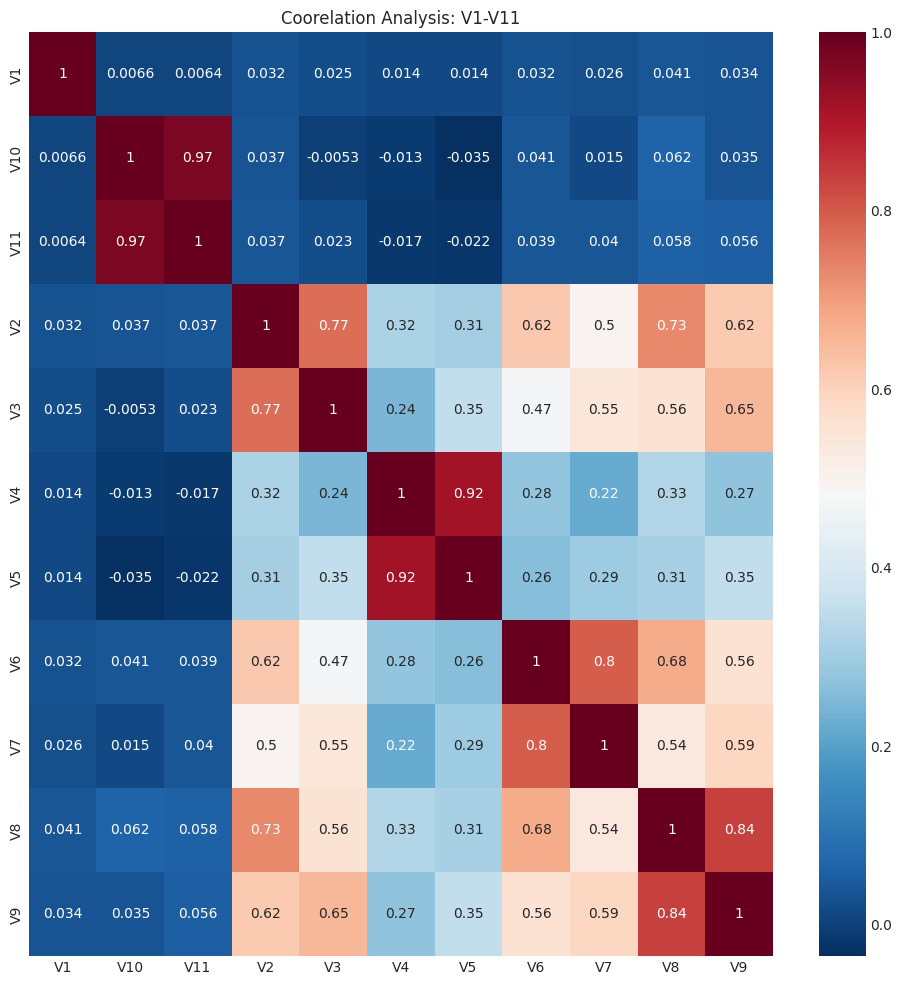

In [87]:
cols = ['V3', 'V9', 'V5', 'V11', 'V10', 'V8', 'V7', 'V6', 'V4', 'V2', 'V1']
coorelation_analysis(cols,title='Coorelation Analysis: V1-V11')

In [88]:
pairs = [['V1'],['V2','V3'],['V4','V5'],['V6','V7'],['V8','V9'],['V10','V11']]
reduce_groups(pairs)

['V1', 'V3', 'V4', 'V6', 'V8', 'V11']

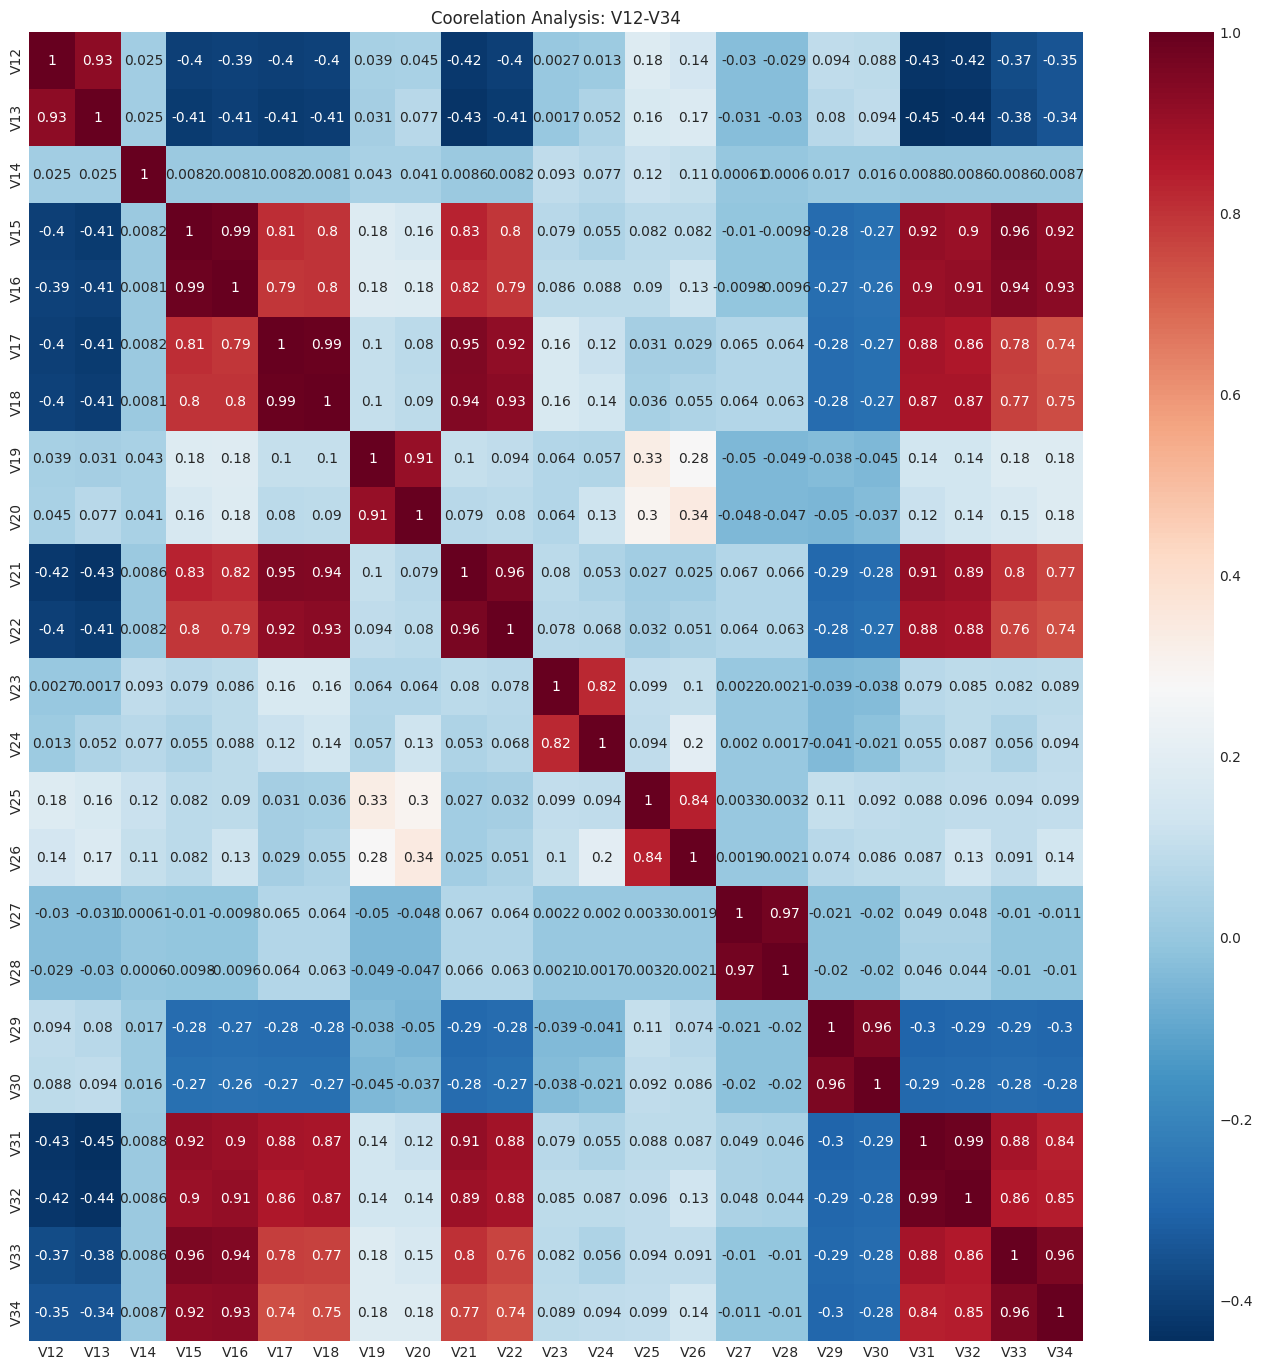

In [89]:
cols = ['V21', 'V22', 'V23', 'V34', 'V33', 'V32','V31', 'V30', 'V29', 'V28',
         'V27', 'V25', 'V24', 'V26', 'V16', 'V15',
        'V20', 'V14', 'V19', 'V18', 'V17', 'V12', 'V13']

coorelation_analysis(cols,title='Coorelation Analysis: V12-V34',size=(17,17))

In [90]:
pairs = [['V12','V13'],['V14'],['V15','V16','V17','V18','V21','V22','V31','V32','V33','V34'],['V19','V20'],
         ['V23','V24'],['V25','V26'],['V27','V28'],['V29','V30']]

red_cols = reduce_groups(pairs)
red_cols

['V13', 'V14', 'V17', 'V20', 'V23', 'V26', 'V27', 'V30']

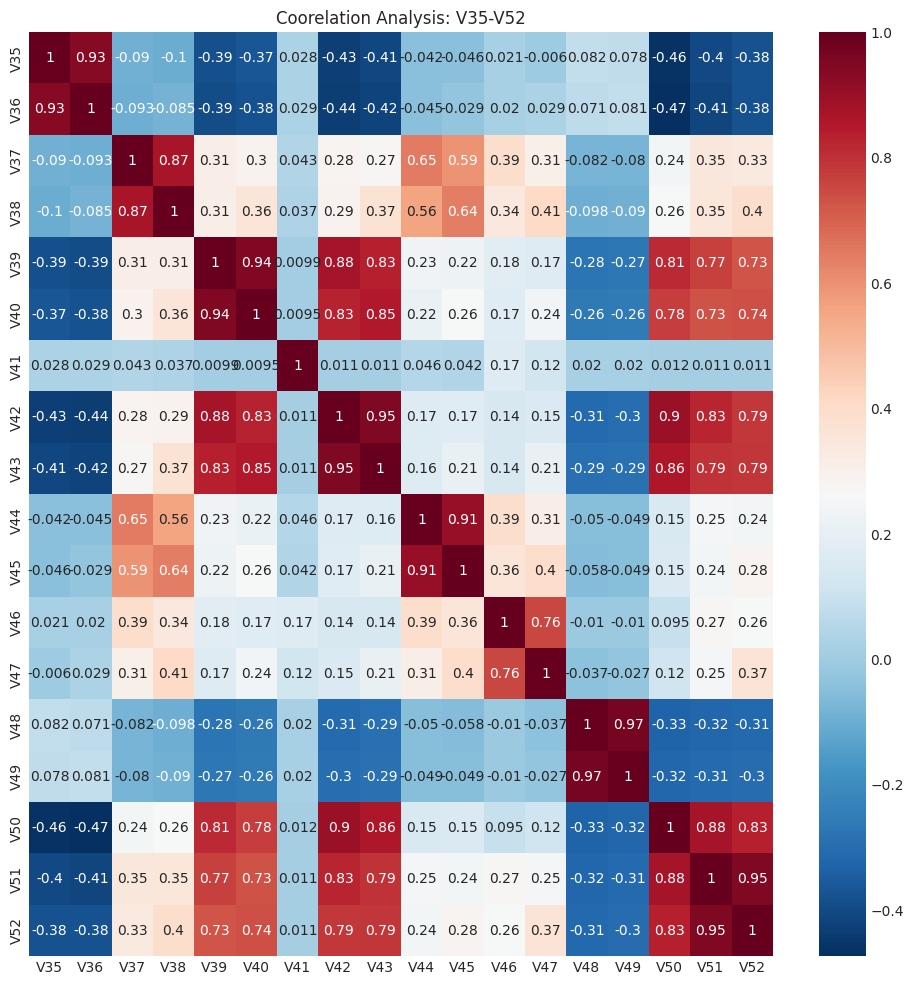

In [91]:
cols = ['V35', 'V40', 'V41', 'V39', 'V38', 'V51', 'V37', 'V52', 'V36', 'V50', 'V48', 'V42',
 'V43', 'V44', 'V46', 'V47', 'V45', 'V49']


coorelation_analysis(cols,title='Coorelation Analysis: V35-V52',size=(12,12))

In [92]:
pairs = [['V35','V36'],['V37','V38'],['V39','V40','V42','V43','V50','V51','V52'],['V41'],
         ['V44','V45'],['V46','V47'],['V48','V49']]

red_cols = reduce_groups(pairs)
red_cols

['V36', 'V37', 'V40', 'V41', 'V44', 'V47', 'V48']

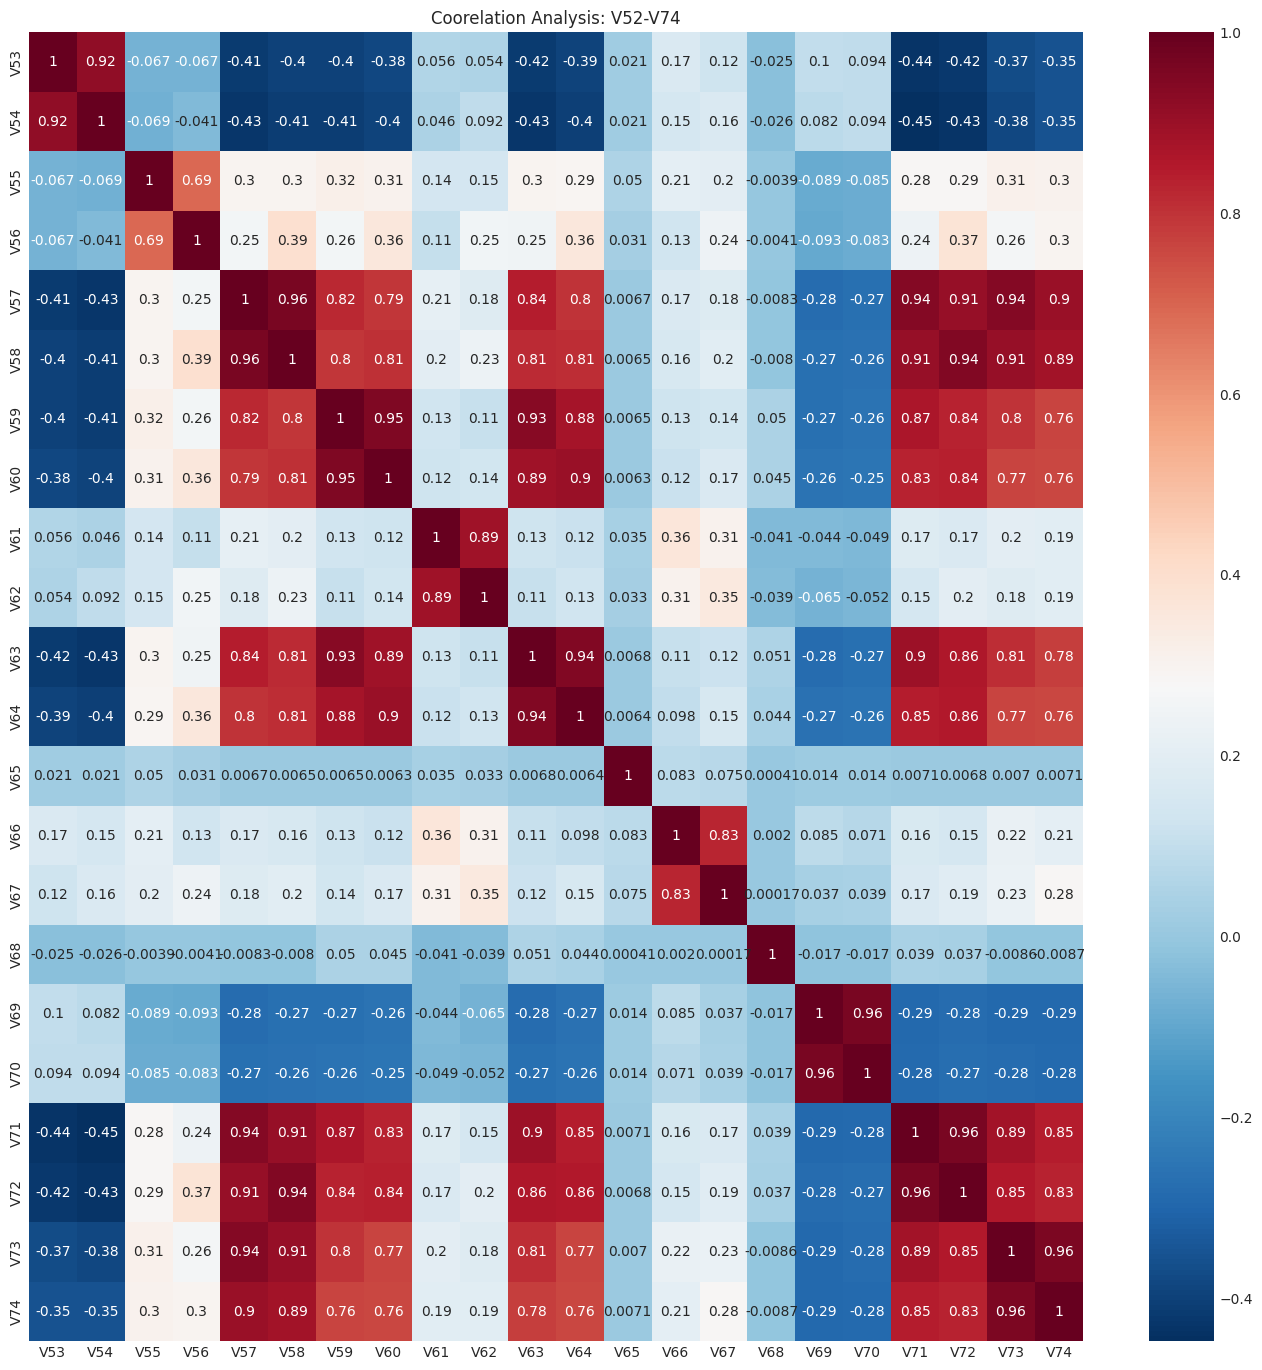

In [93]:
cols = ['V72', 'V74', 'V73', 'V71', 'V65', 'V68', 'V58', 'V70', 'V53',
 'V54', 'V55', 'V56', 'V57', 'V59', 'V67', 'V60', 'V61',
 'V62', 'V63', 'V64', 'V66', 'V69']

coorelation_analysis(cols,title='Coorelation Analysis: V52-V74',size=(17,17))

In [94]:
pairs = [['V53','V54'],['V55'],['V56'],['V57', 'V58', 'V59', 'V60', 'V63', 'V64', 'V71', 'V72', 'V73', 'V74'],['V61','V62'],
 ['V65'],['V66','V67'],['V68'],['V69','V70']]



red_cols = reduce_groups(pairs)
red_cols

['V54', 'V55', 'V56', 'V59', 'V62', 'V65', 'V67', 'V68', 'V70']

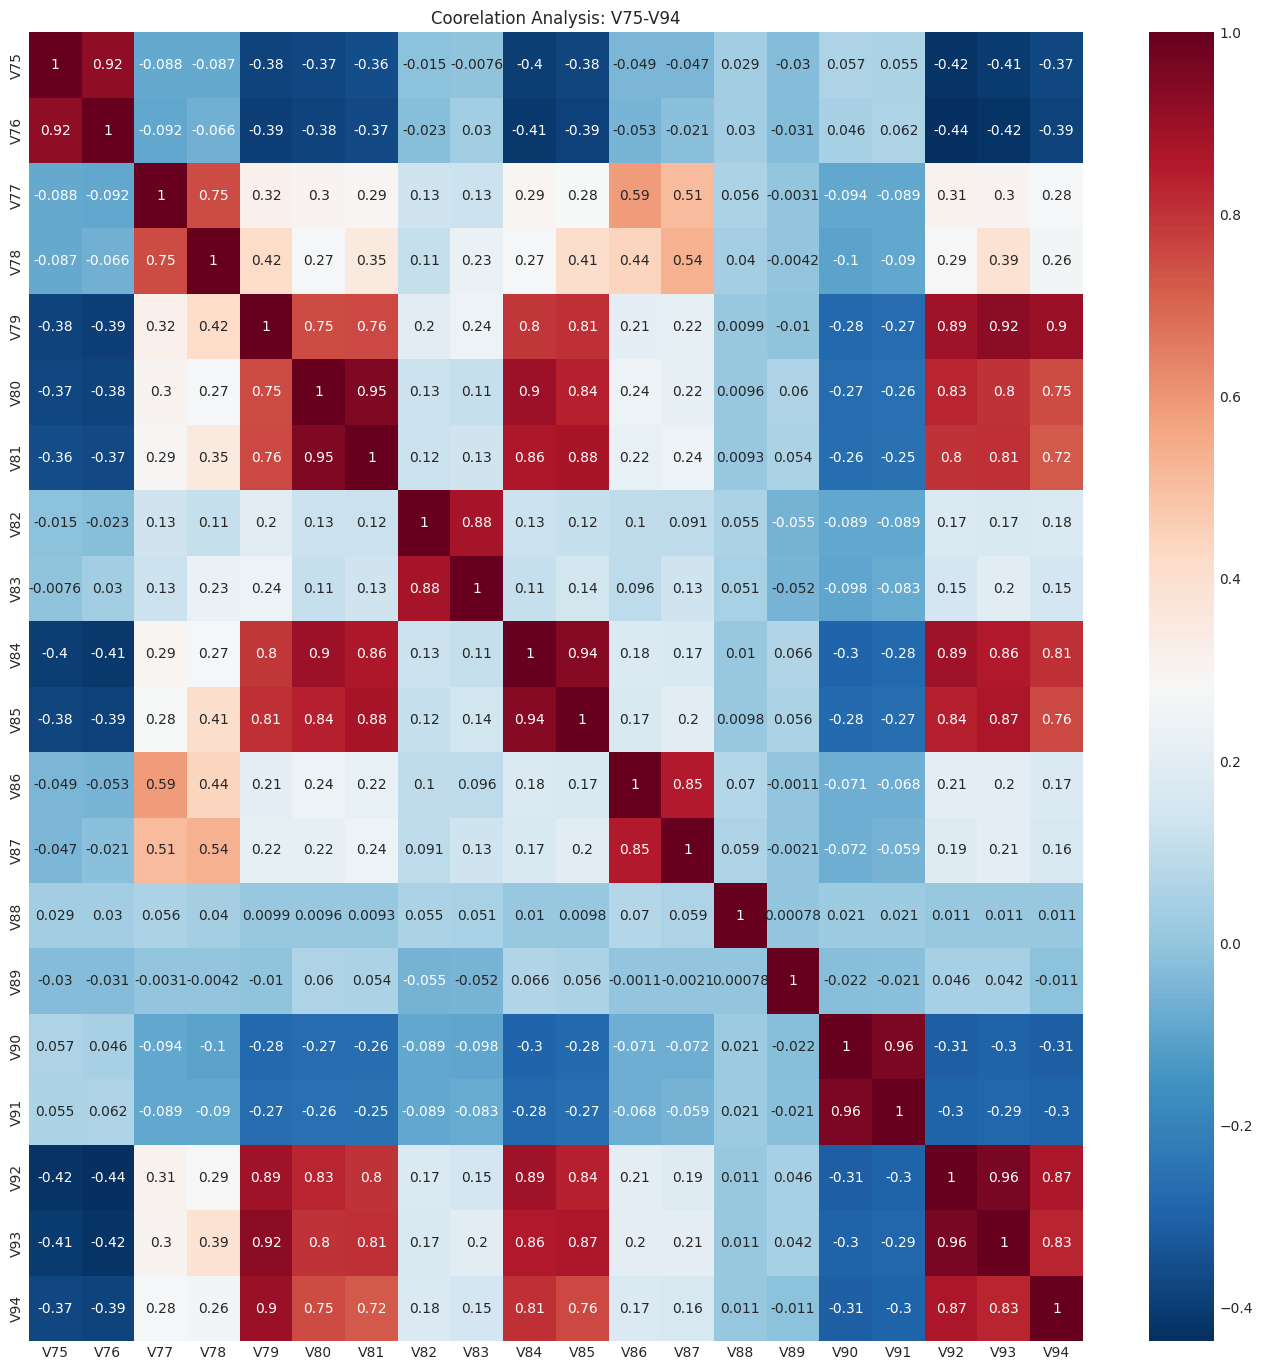

In [95]:
cols = ['V80', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V86', 'V79',
 'V85', 'V75', 'V84', 'V77', 'V83', 'V78', 'V82', 'V81', 'V76']

coorelation_analysis(cols,title='Coorelation Analysis: V75-V94',size=(17,17))

In [96]:
pairs = [['V75','V76'],['V77','V78'],['V79','V80','V81','V84','V85','V92','V93','V94'],['V82','V83'],['V86','V87'],
         ['V88'],['V89'],['V90','V91']]


red_cols = reduce_groups(pairs)
red_cols

['V76', 'V78', 'V80', 'V82', 'V86', 'V88', 'V89', 'V91']

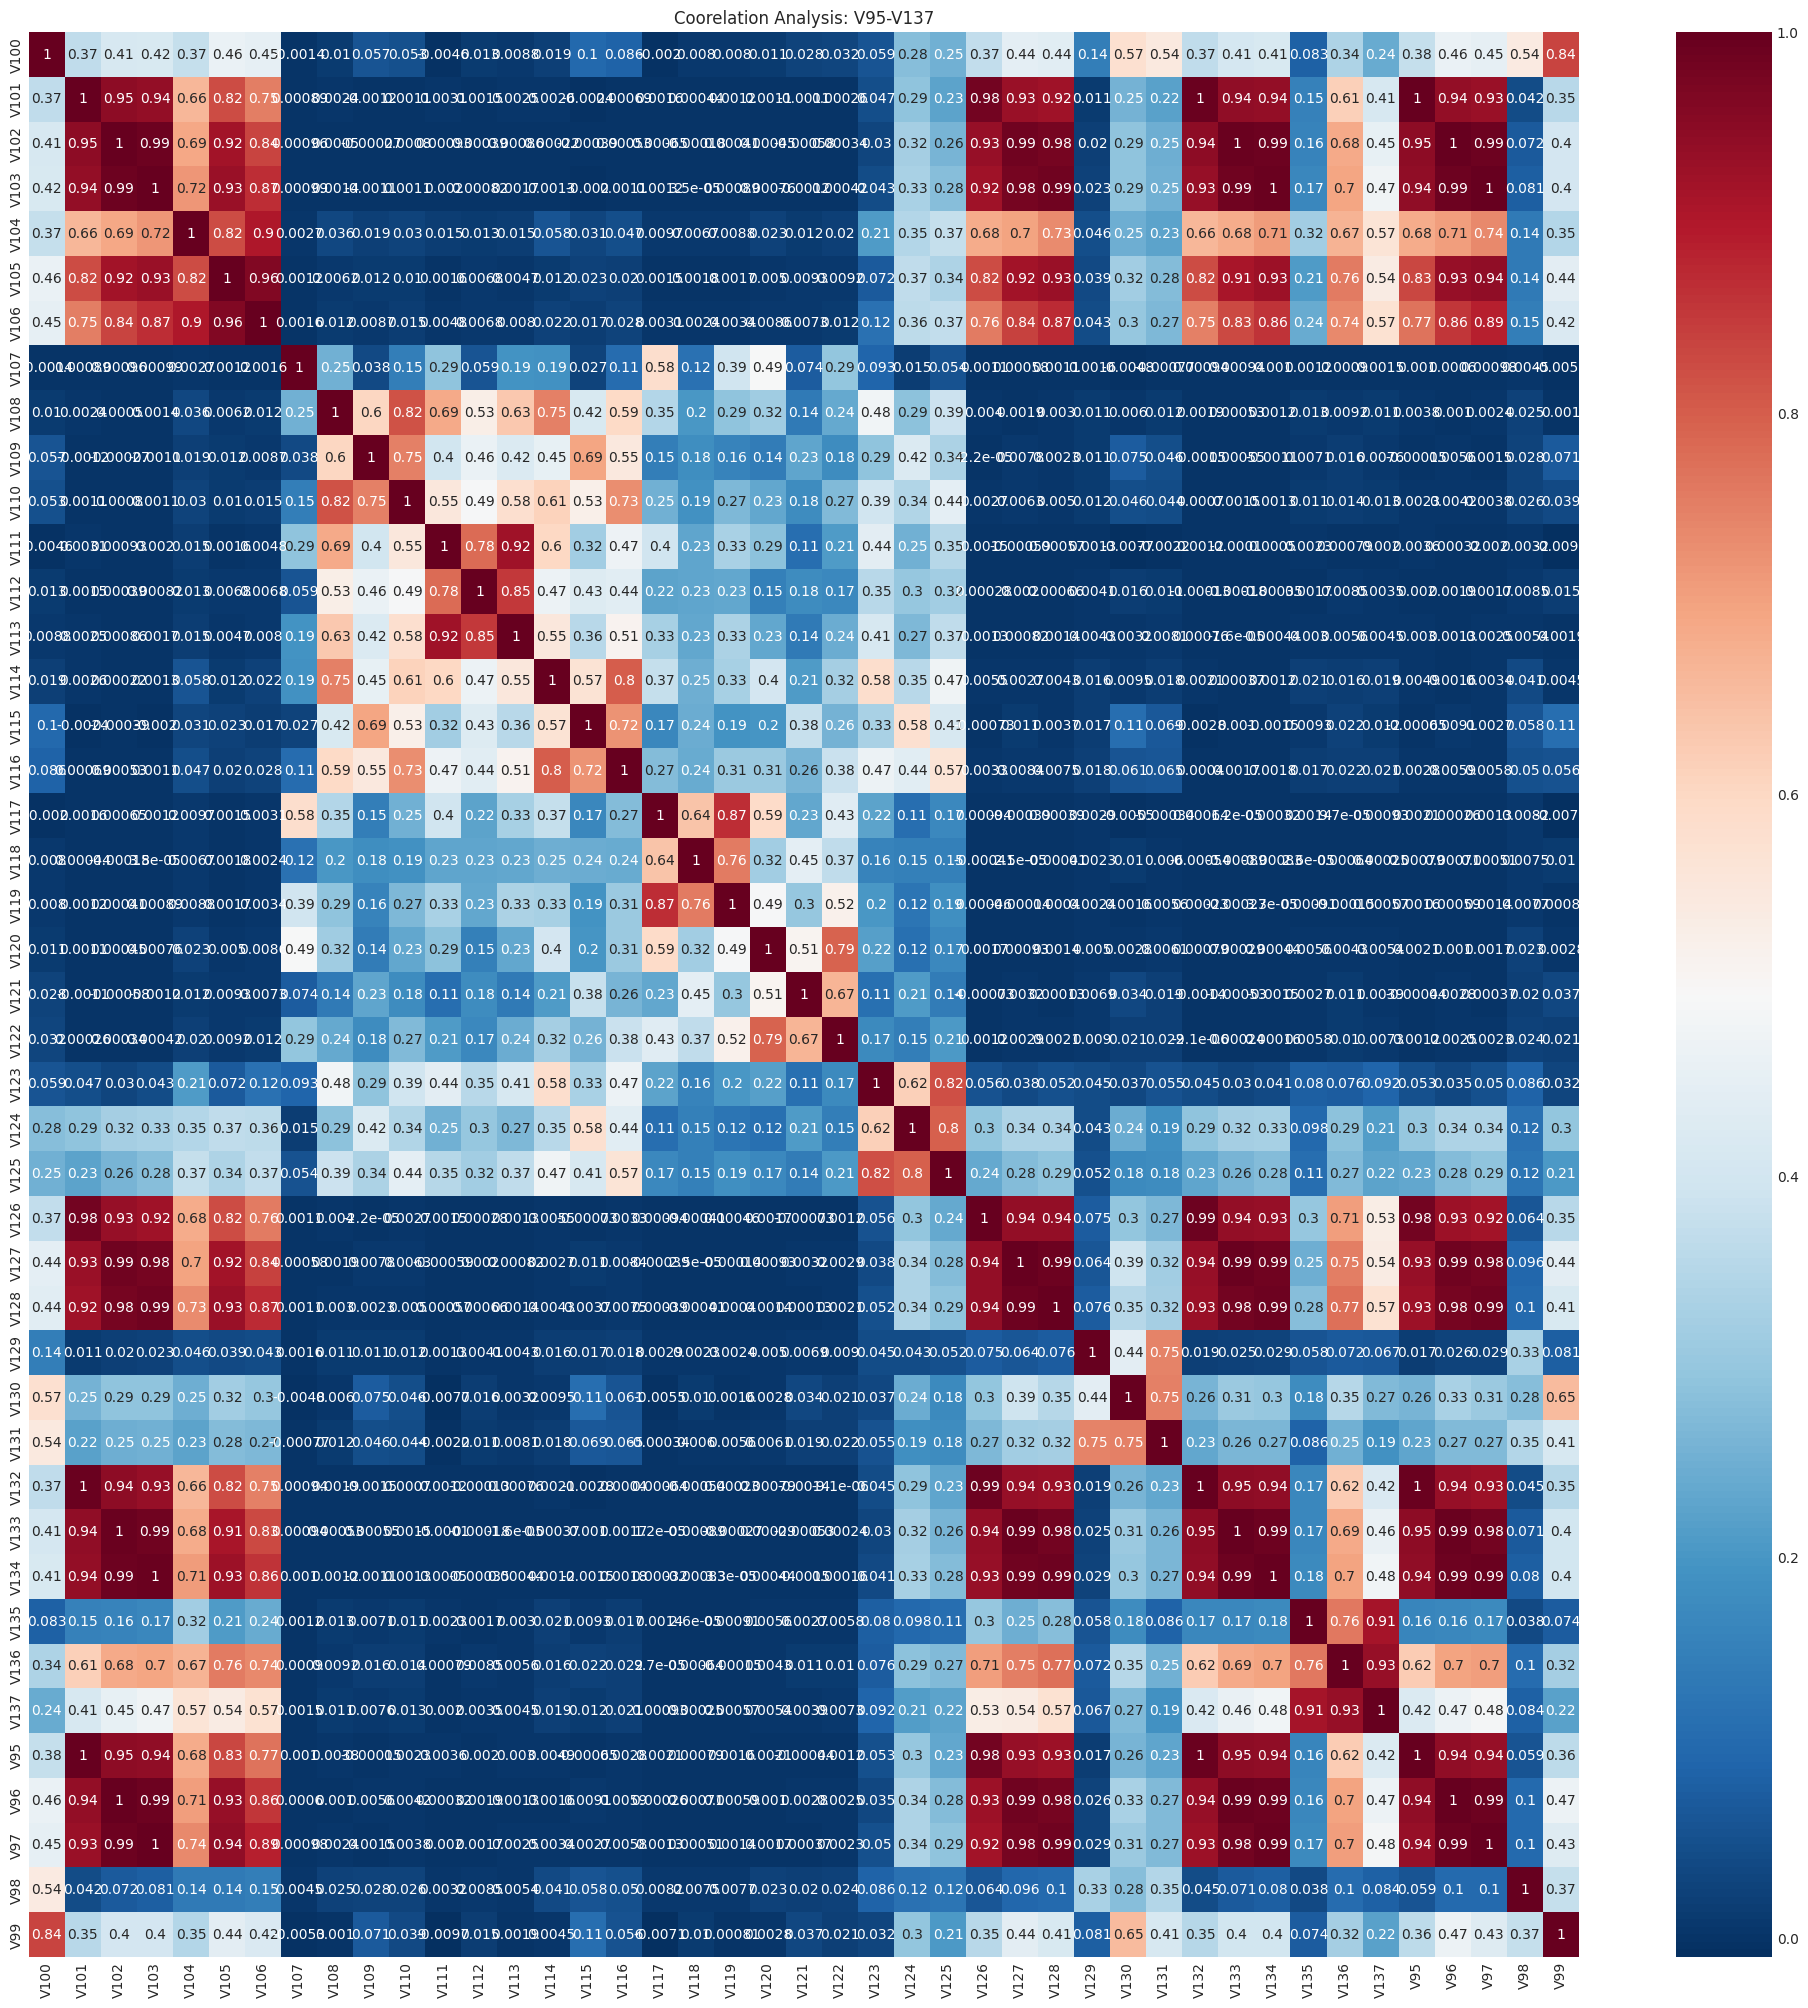

In [97]:
cols = ['V104', 'V109', 'V110', 'V111', 'V112', 'V106', 'V105', 'V102', 'V103', 'V96', 'V101', 'V100',
        'V99', 'V98', 'V97', 'V95', 'V135', 'V134', 'V107', 'V133', 'V132', 'V131', 'V130', 'V129', 
        'V128', 'V127', 'V126', 'V125', 'V124', 'V123', 'V122', 'V121', 
        'V120', 'V119', 'V118', 'V117', 'V116', 'V115', 'V114', 'V113', 'V136', 'V137', 'V108']

coorelation_analysis(cols,title='Coorelation Analysis: V95-V137',size=(25,25))

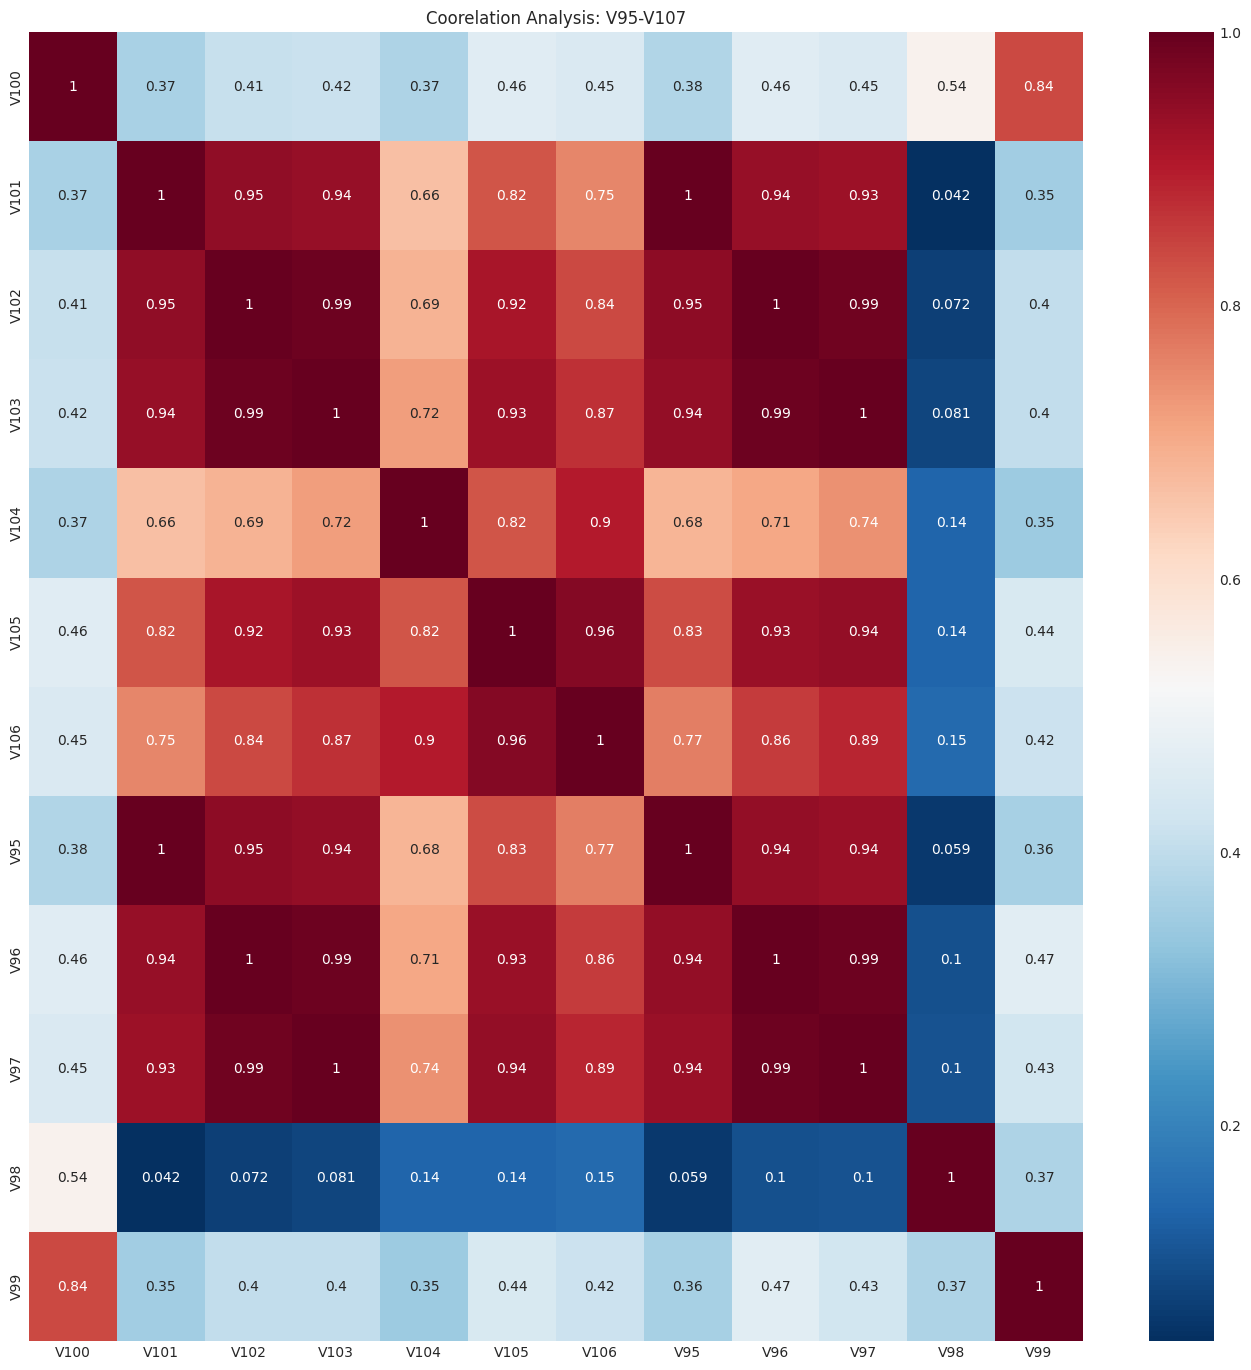

In [98]:
cols = ['V'+str(x) for x in range(95,107)]

coorelation_analysis(cols,title='Coorelation Analysis: V95-V107',size=(17,17))

In [99]:
pairs = [['V99','V100'],['V98'],['V104'],['V95','V96','V97','V101','V102','V103','V105','V106']]

red_cols = reduce_groups(pairs)
red_cols

['V99', 'V98', 'V104', 'V96']

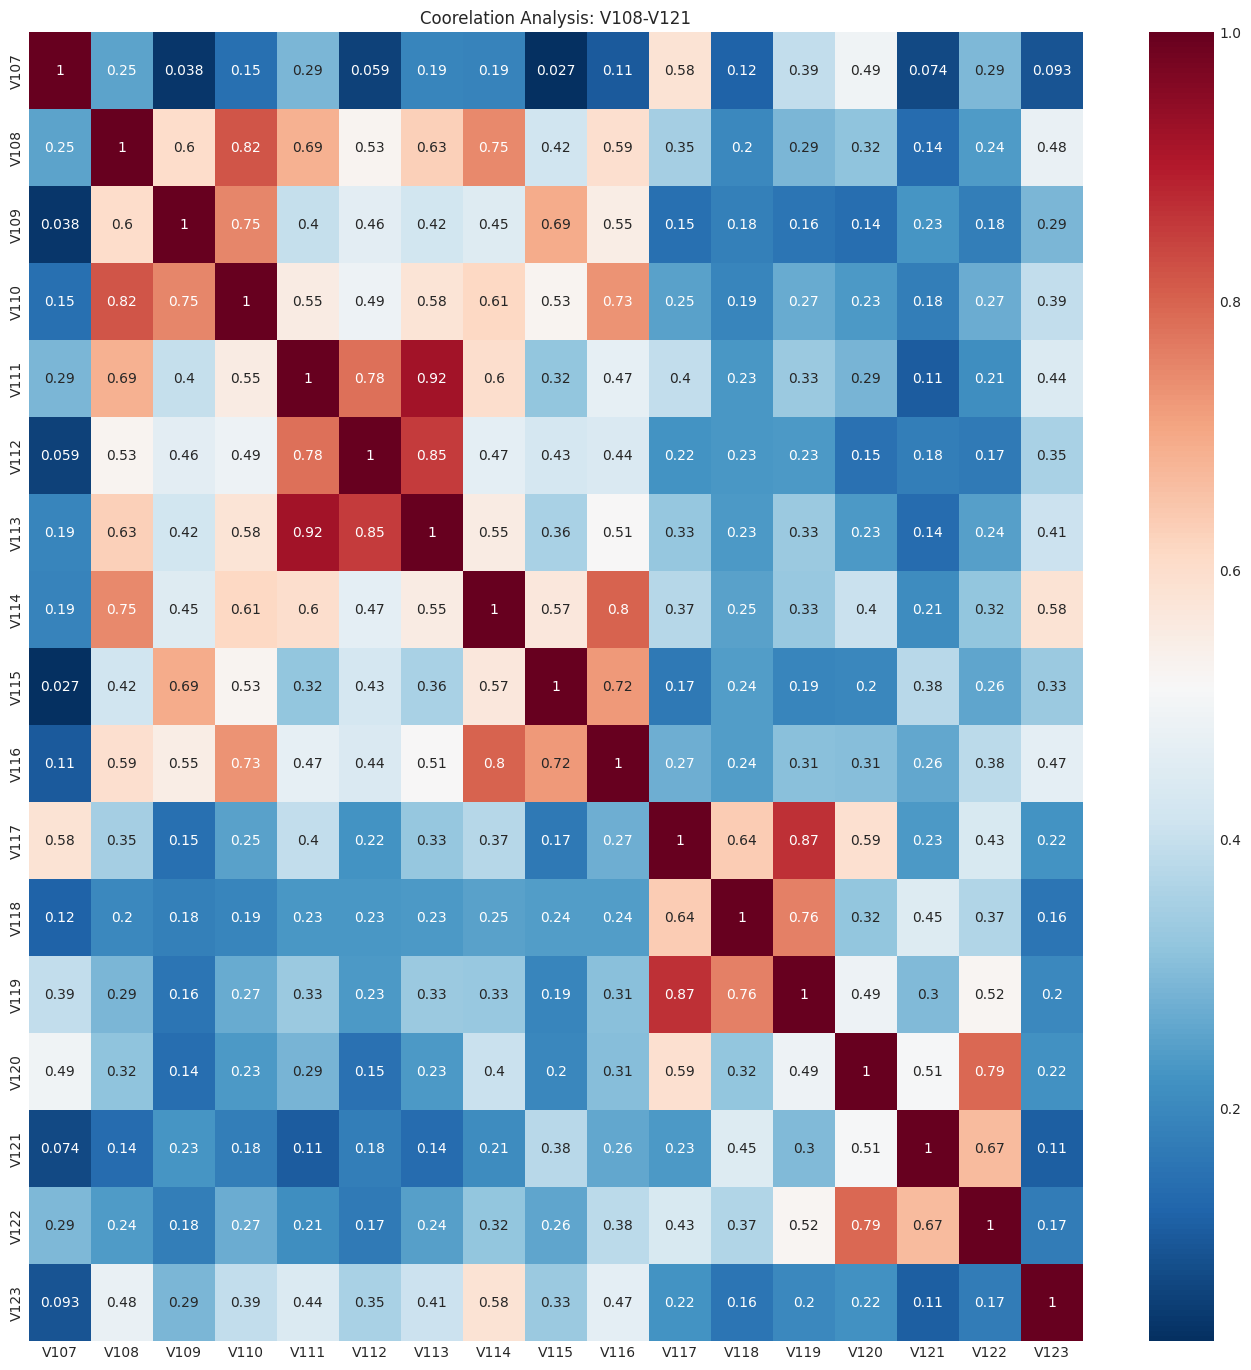

In [100]:
cols = ['V'+str(x) for x in range(107,124)]

coorelation_analysis(cols,title='Coorelation Analysis: V108-V121',size=(17,17))

In [101]:
pairs = [['V107'],['V108','V109','V110','V114'],['V111','V112','V113'],['V115','V116'],['V117','V118','V119'],['V120','V122'],['V121'],['V123']]

red_cols = reduce_groups(pairs)
red_cols

['V107', 'V108', 'V111', 'V115', 'V117', 'V120', 'V121', 'V123']

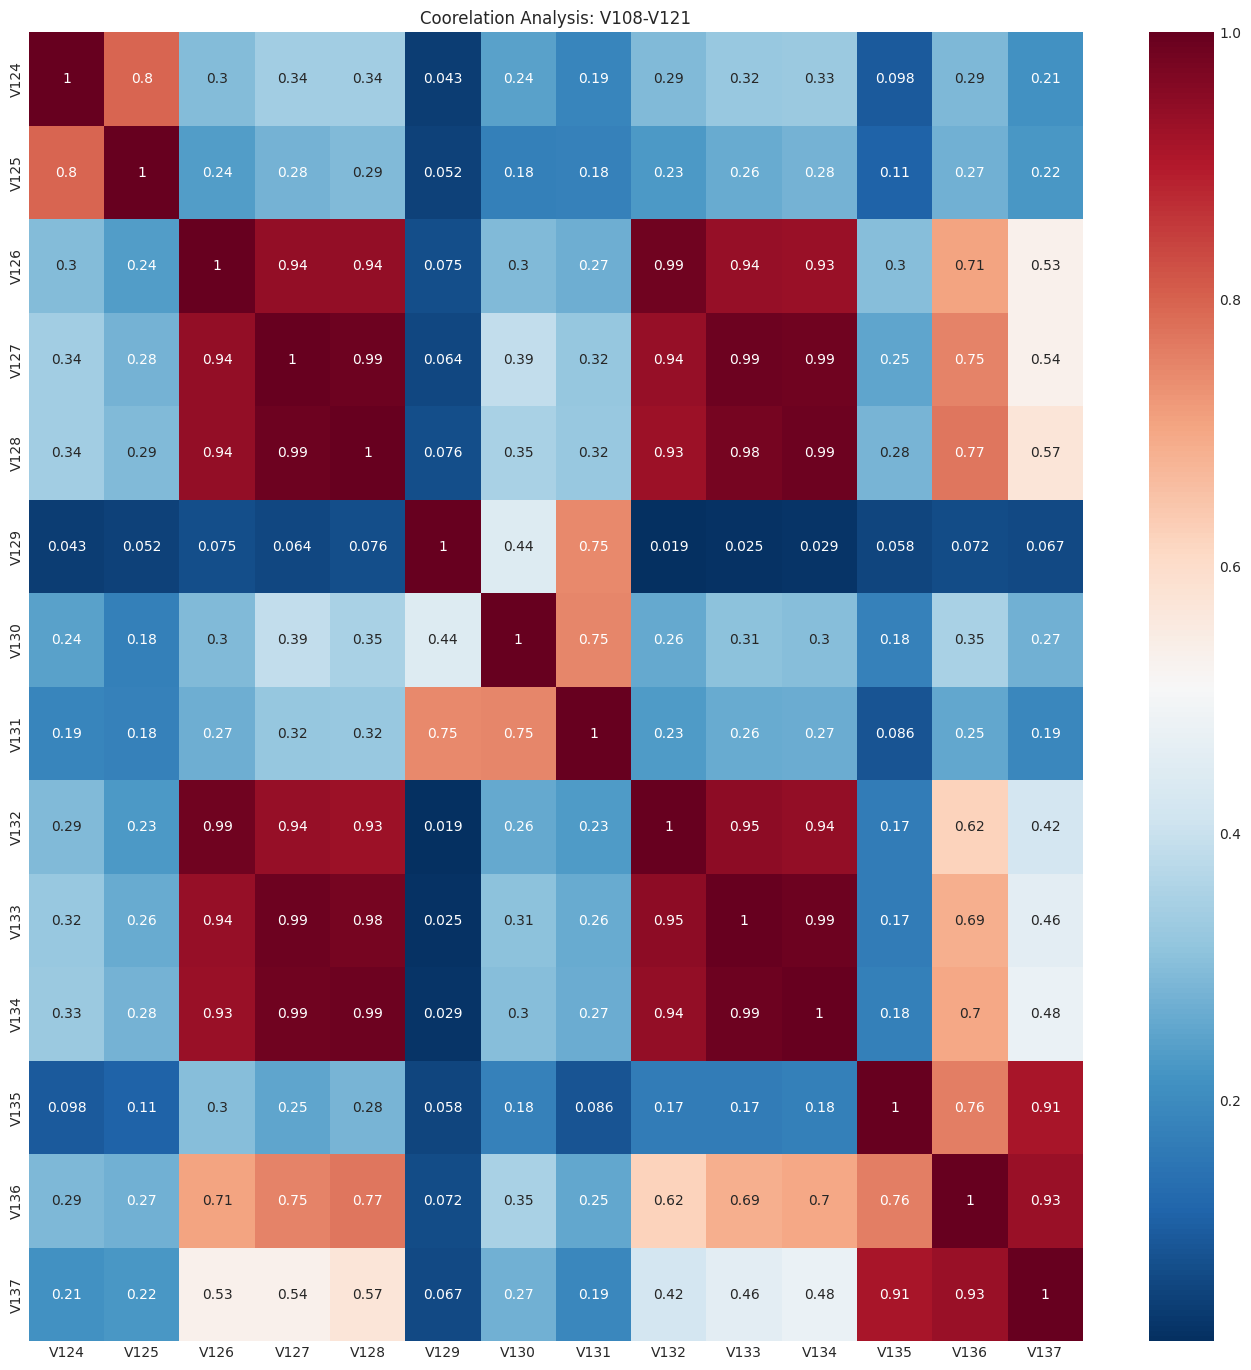

In [102]:
cols = ['V'+str(x) for x in range(124,138)]
coorelation_analysis(cols,title='Coorelation Analysis: V108-V121',size=(17,17))

In [103]:
pairs = [['V124','V125'],['V126','V127','V128','V132','V133','V134'],['V129'],['V130','V131'],['V135','V136','V137']]

red_cols = reduce_groups(pairs)
red_cols

['V124', 'V127', 'V129', 'V130', 'V136']

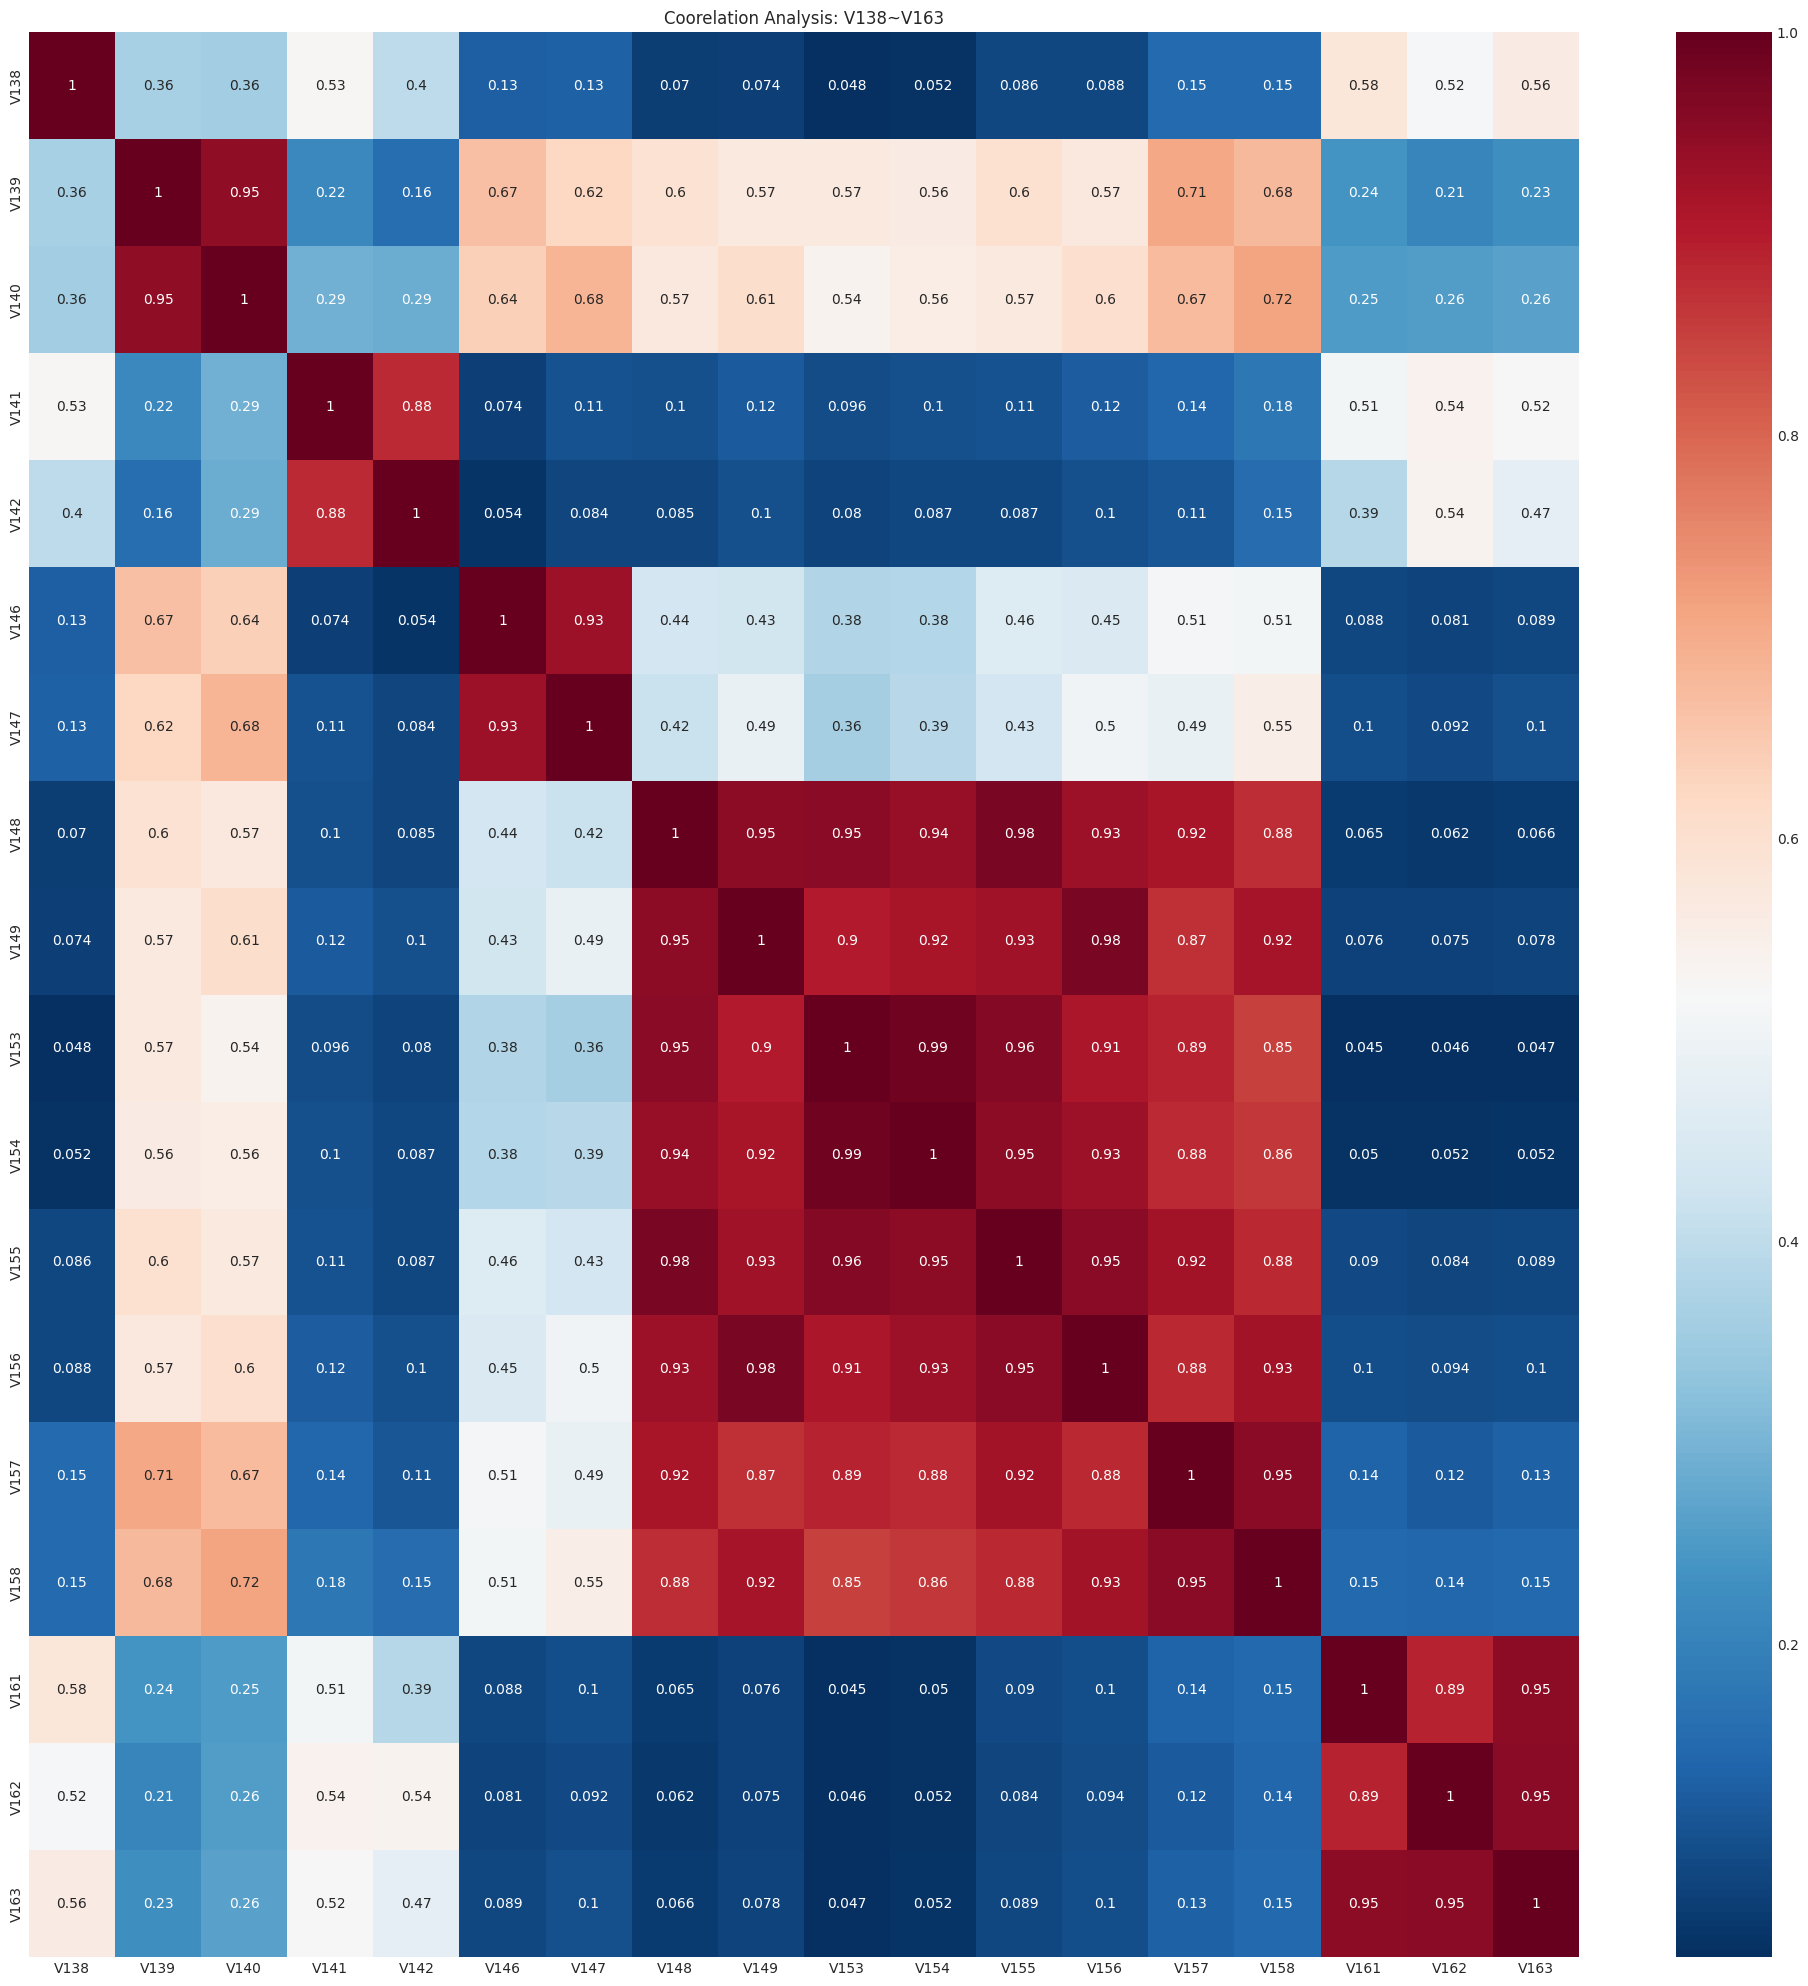

In [104]:
cols = ['V142', 'V158', 'V140', 'V162', 'V141', 'V161', 'V157', 'V146', 'V156', 'V155', 'V154',
        'V153', 'V149', 'V147', 'V148', 'V163', 'V139', 'V138']

coorelation_analysis(cols,title='Coorelation Analysis: V138~V163',size=(25,25))

In [105]:
pairs = [['V138'],['V139','V140'],['V141','V142'],['V146','V147'],['V148','V149','V153','V154','V156','V157','V158'],['V161','V162','V163']]

red_cols = reduce_groups(pairs)
red_cols

['V138', 'V139', 'V142', 'V147', 'V156', 'V162']

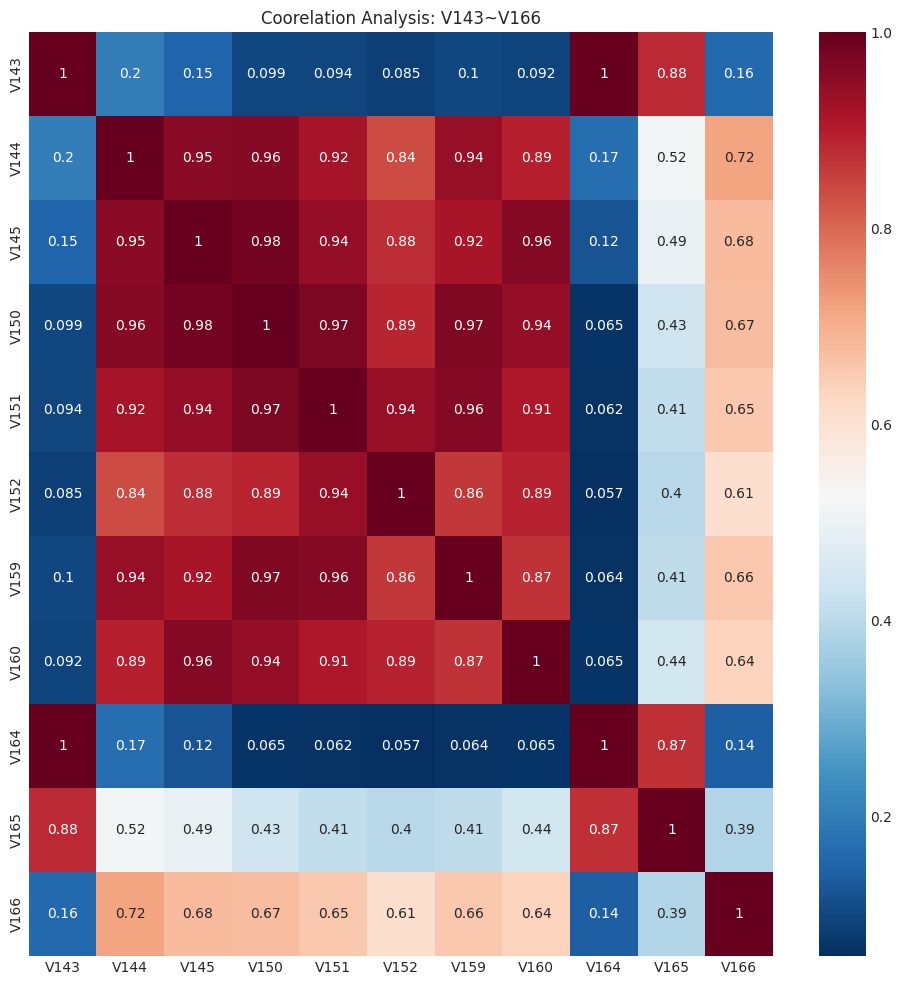

In [106]:
cols = ['V160', 'V151', 'V152', 'V145', 'V144', 'V143', 'V159', 'V164', 'V165', 'V166', 'V150']

coorelation_analysis(cols,title='Coorelation Analysis: V143~V166',size=(12,12))

In [107]:
pairs = [['V143','V164','V165'],['V144','V145','V150','V151','V152','V159','V160'],['V166']]

red_cols = reduce_groups(pairs)
red_cols

['V165', 'V160', 'V166']

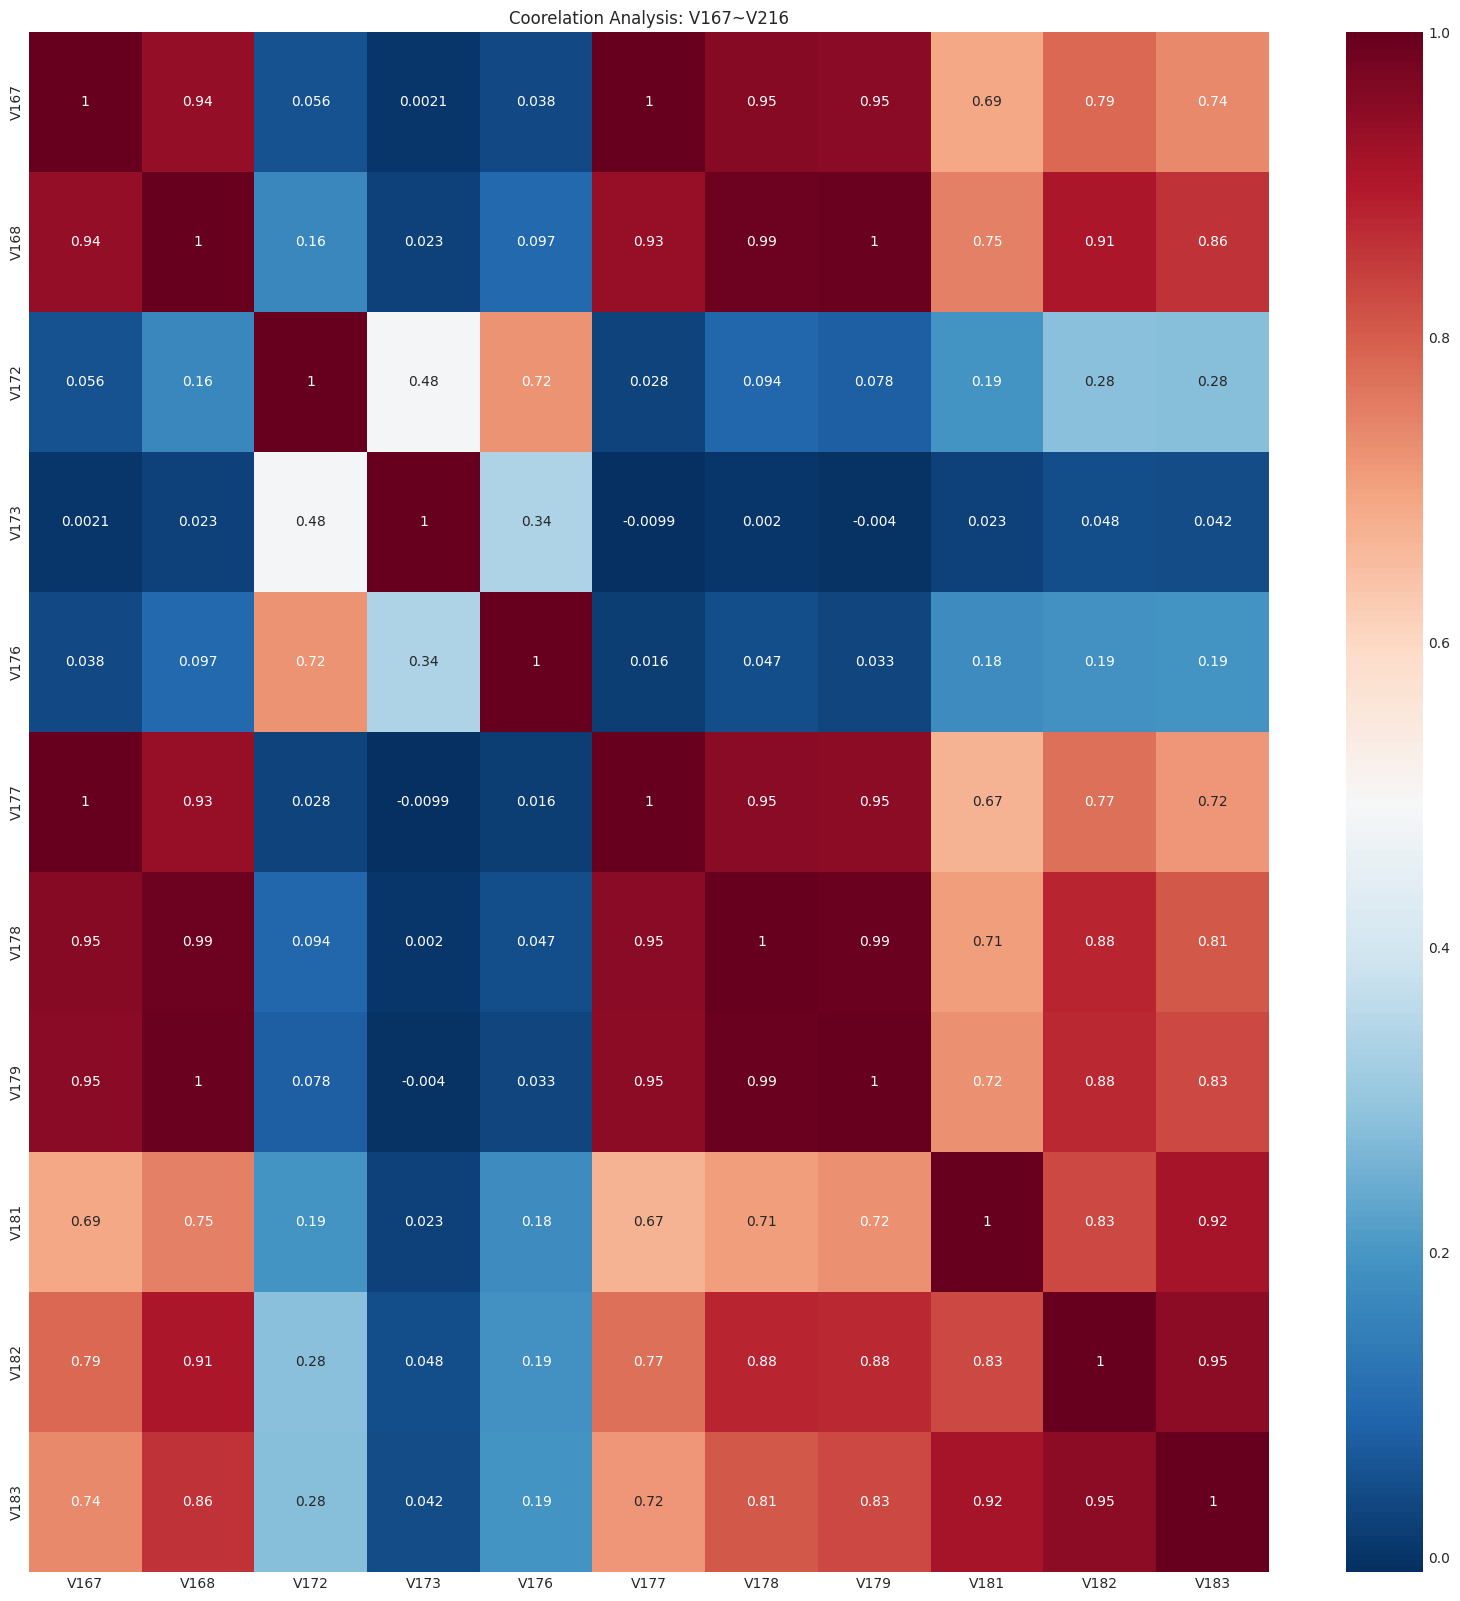

In [108]:
cols = ['V167', 'V168','V172','V173','V176','V177','V178','V179','V181','V182','V183']

coorelation_analysis(cols,title='Coorelation Analysis: V167~V216',size=(20,20))

In [109]:
pairs = [['V167','V168','V177','V178','V179'],['V172','V176'],['V173'],['V181','V182','V183']]
reduce_groups(pairs)

['V178', 'V176', 'V173', 'V182']

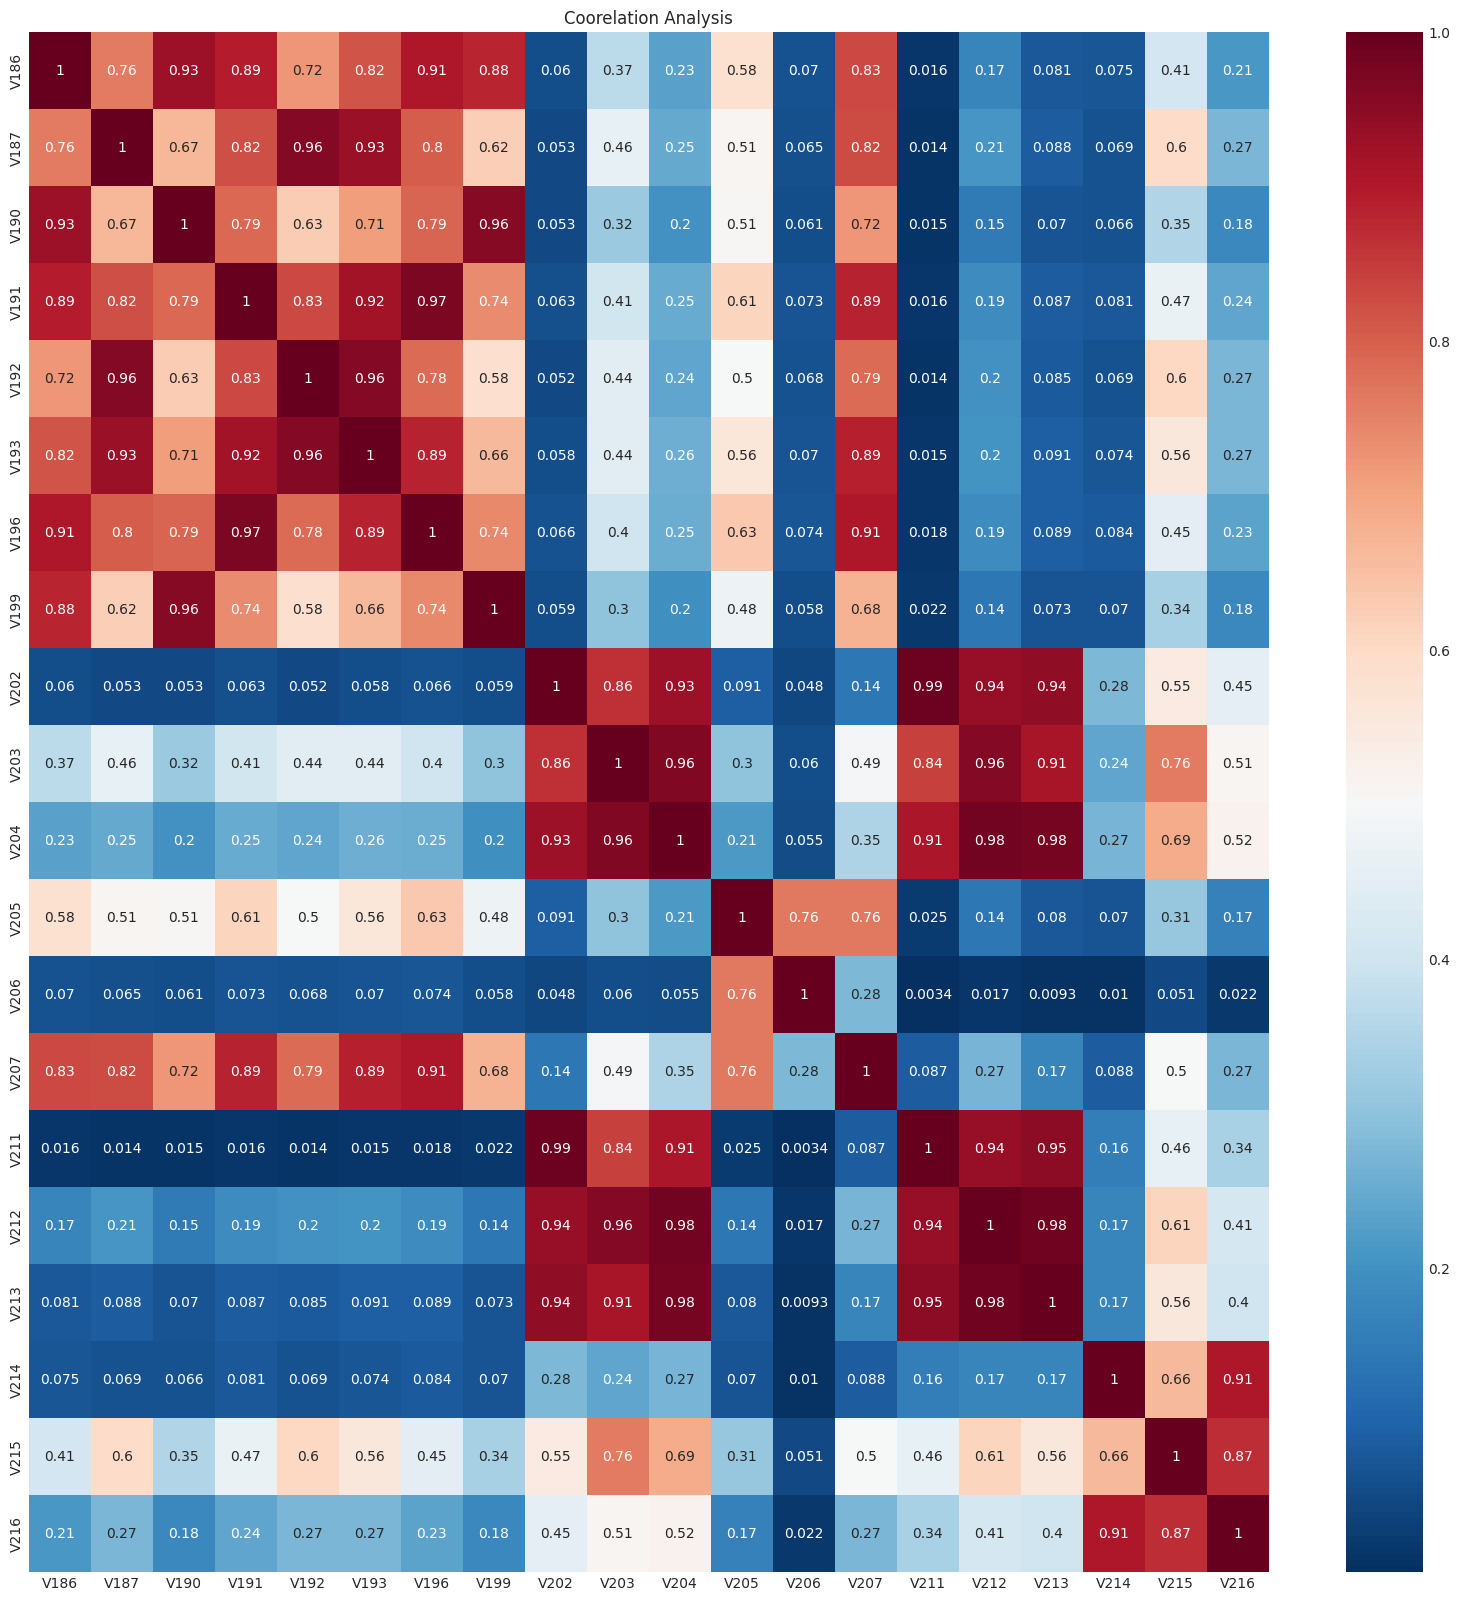

In [110]:
cols = ['V186','V187','V190','V191','V192','V193','V196','V199','V202','V203','V204','V211','V212','V213','V205','V206','V207','V214','V215','V216']

coorelation_analysis(cols,title='Coorelation Analysis',size=(20,20))

In [111]:
pairs = [['V186','V187','V190','V191','V192','V193','V196','V199'],['V202','V203','V204','V211','V212','V213'],['V205','V206'],['V207'],['V214','V215','V216']]
reduce_groups(pairs)

['V187', 'V203', 'V205', 'V207', 'V215']

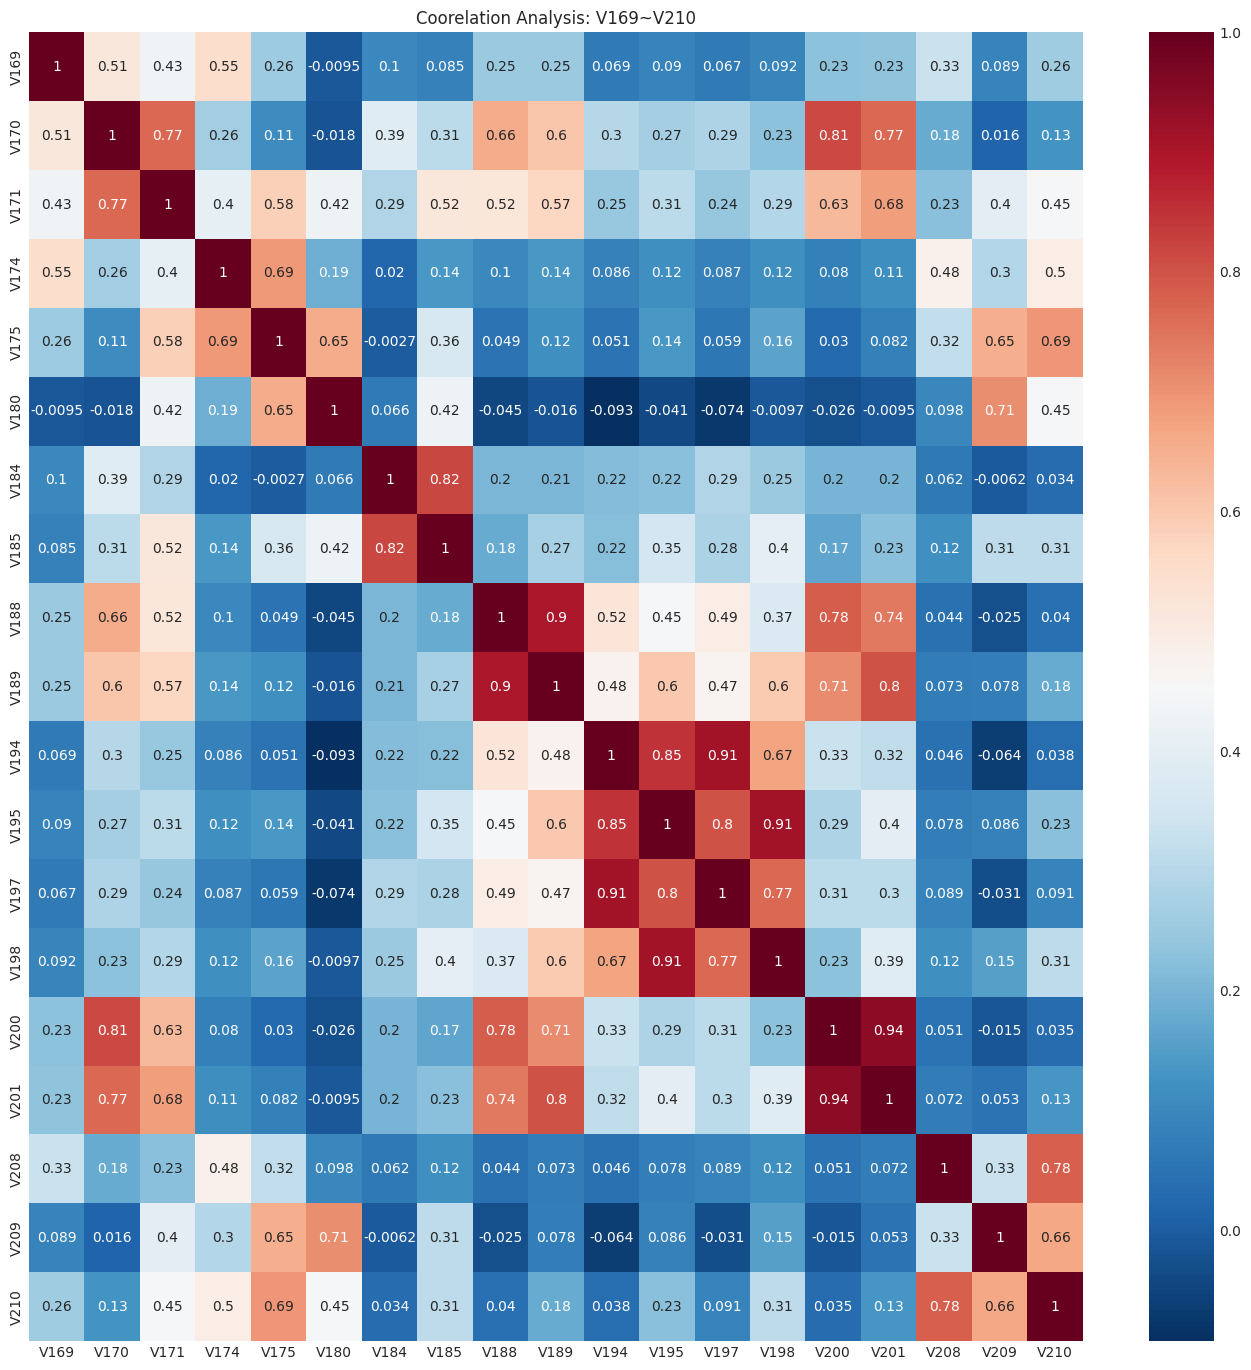

In [112]:
cols = ['V194', 'V200', 'V189', 'V188', 'V185', 'V184', 'V180', 'V175', 'V174', 'V171',
 'V170', 'V169', 'V195', 'V201', 'V197', 'V198', 'V209', 'V208', 'V210']


coorelation_analysis(cols,title='Coorelation Analysis: V169~V210',size=(17,17))

In [113]:
pairs = [['V169'],['V170','V171','V200','V201'],['V174','V175'],['V180'],['V184','V185'],['V188','V189'],['V194','V195','V197','V198'],['V208','V210'],
         ['V209']]

red_cols = reduce_groups(pairs)
red_cols

['V169', 'V171', 'V175', 'V180', 'V185', 'V188', 'V198', 'V210', 'V209']

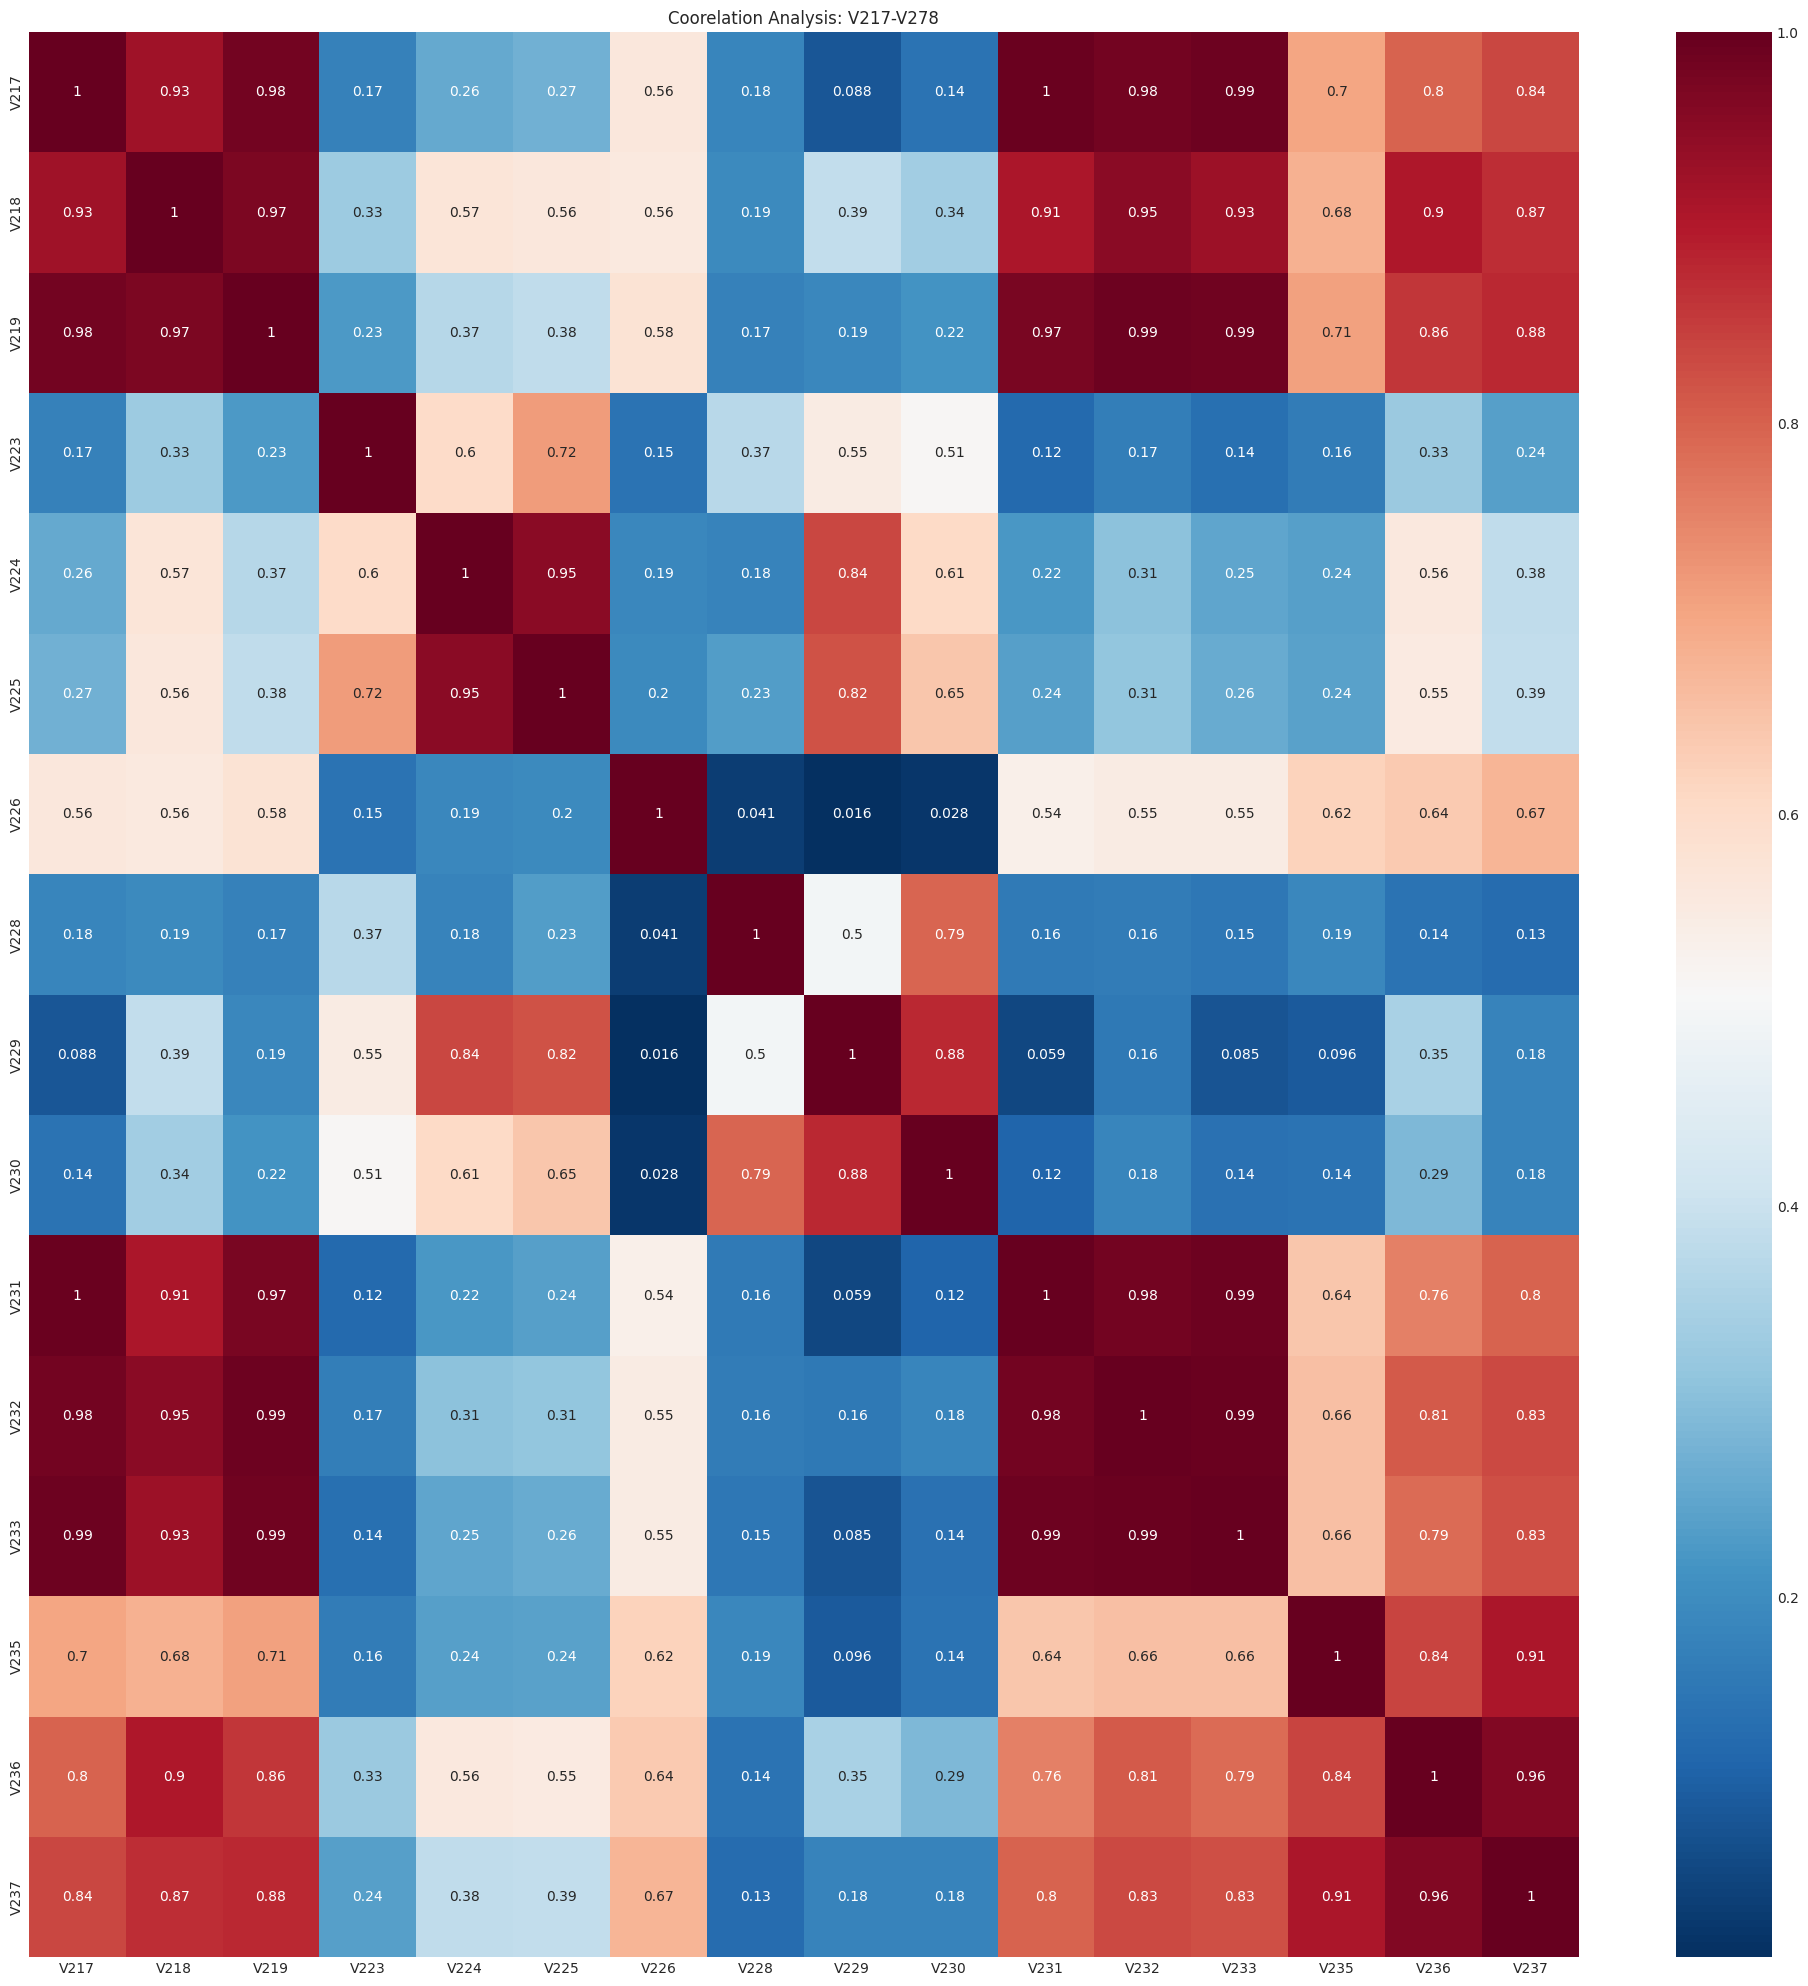

In [114]:
cols = ['V217','V218','V219','V231','V232','V233','V236','V237','V223','V224','V225','V226','V228','V229','V230','V235']


coorelation_analysis(cols,title='Coorelation Analysis: V217-V278',size=(25,25))

In [115]:
pairs = [['V217','V218','V219','V231','V232','V233','V236','V237'],['V223'],['V224','V225'],['V226'],['V228'],['V229','V230'],['V235']]
reduce_groups(pairs)

['V218', 'V223', 'V224', 'V226', 'V228', 'V229', 'V235']

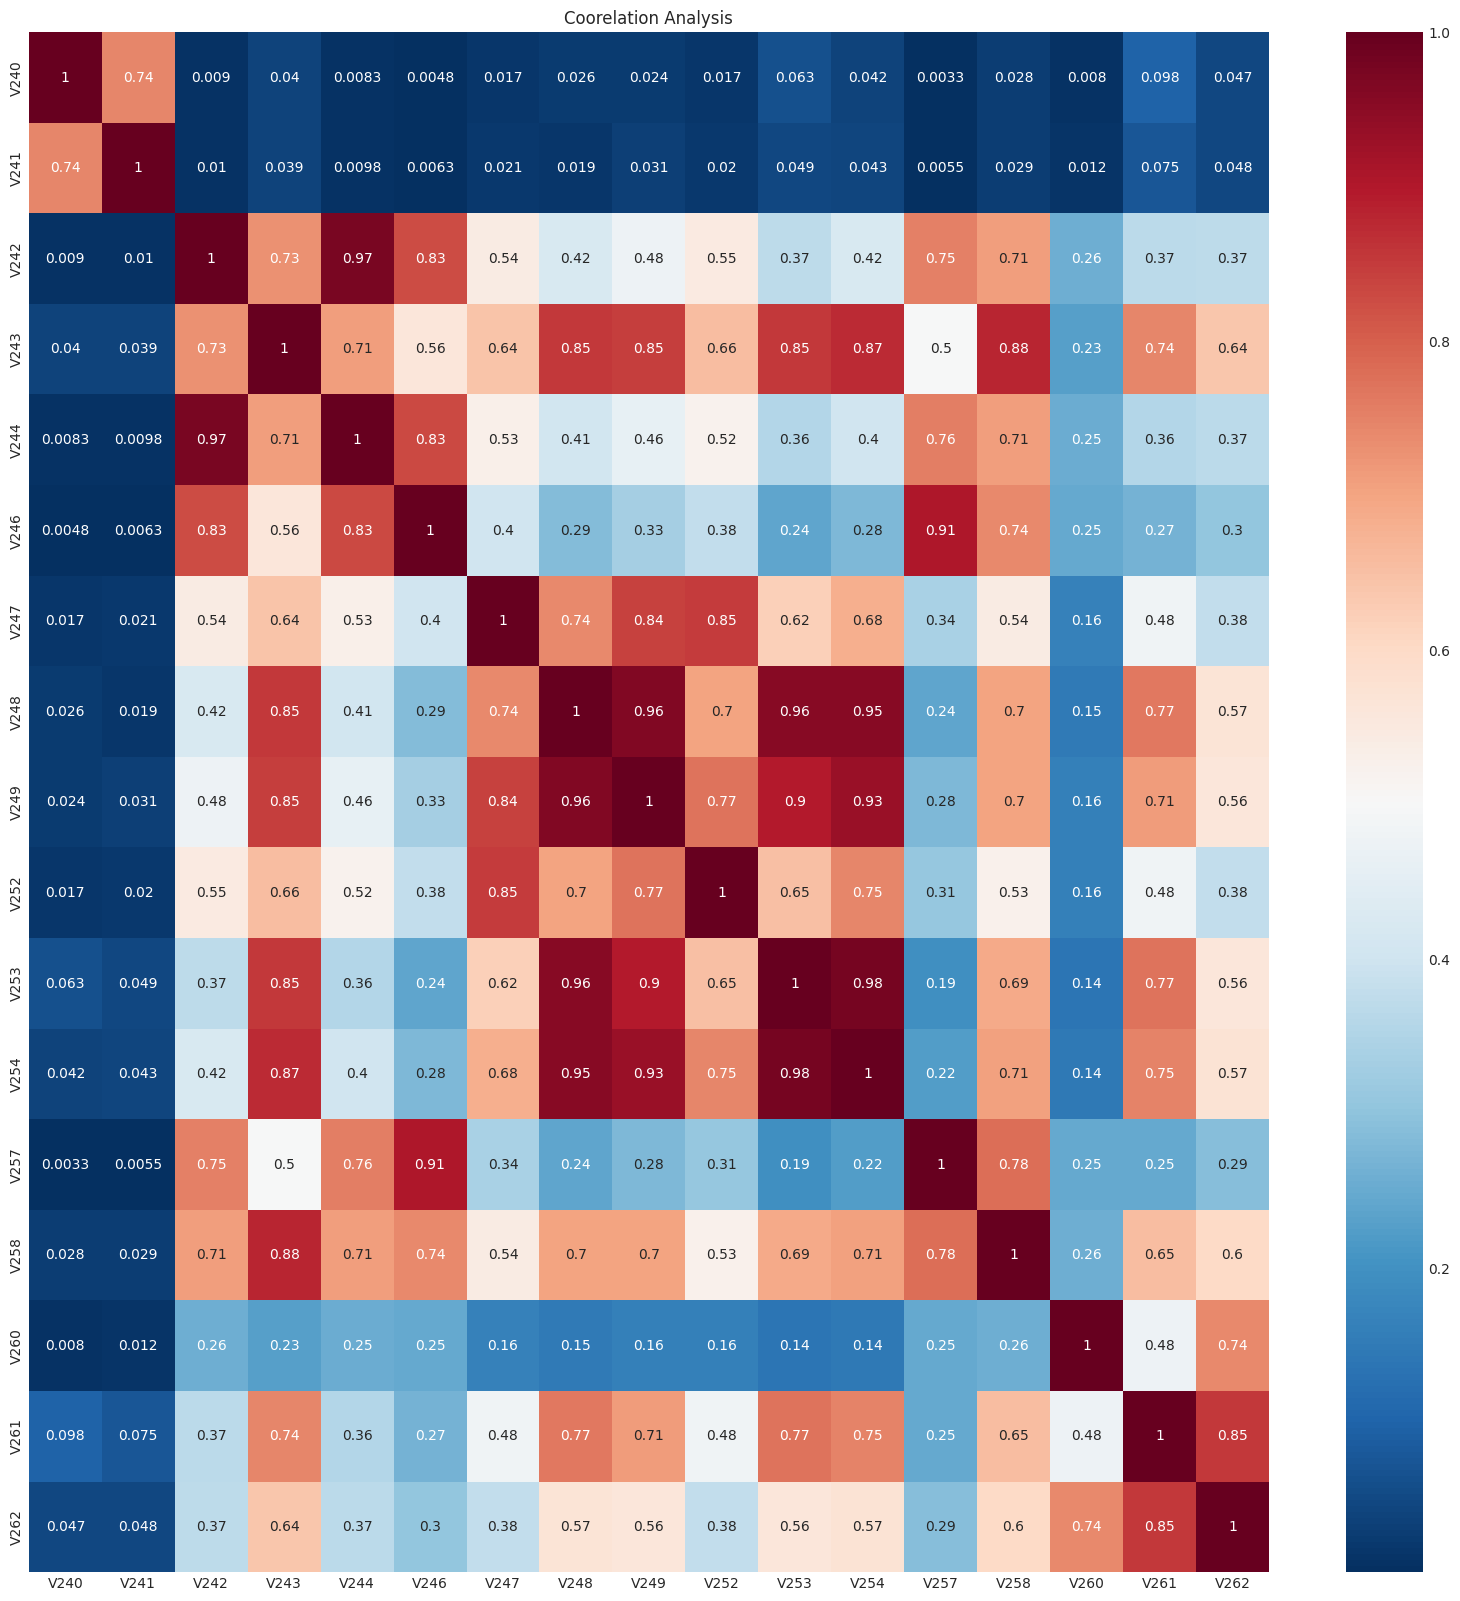

In [116]:
cols = ['V240','V241','V242','V243','V244','V258','V246','V257','V247','V248','V249','V253','V254','V252','V260','V261','V262']

coorelation_analysis(cols,title='Coorelation Analysis',size=(20,20))

In [117]:
pairs = [['V240','V241'],['V242','V243','V244','V258'],['V246','V257'],['V247','V248','V249','V253','V254'],['V252'],['V260'],['V261','V262']]

red_cols = reduce_groups(pairs)
red_cols

['V240', 'V258', 'V257', 'V253', 'V252', 'V260', 'V261']

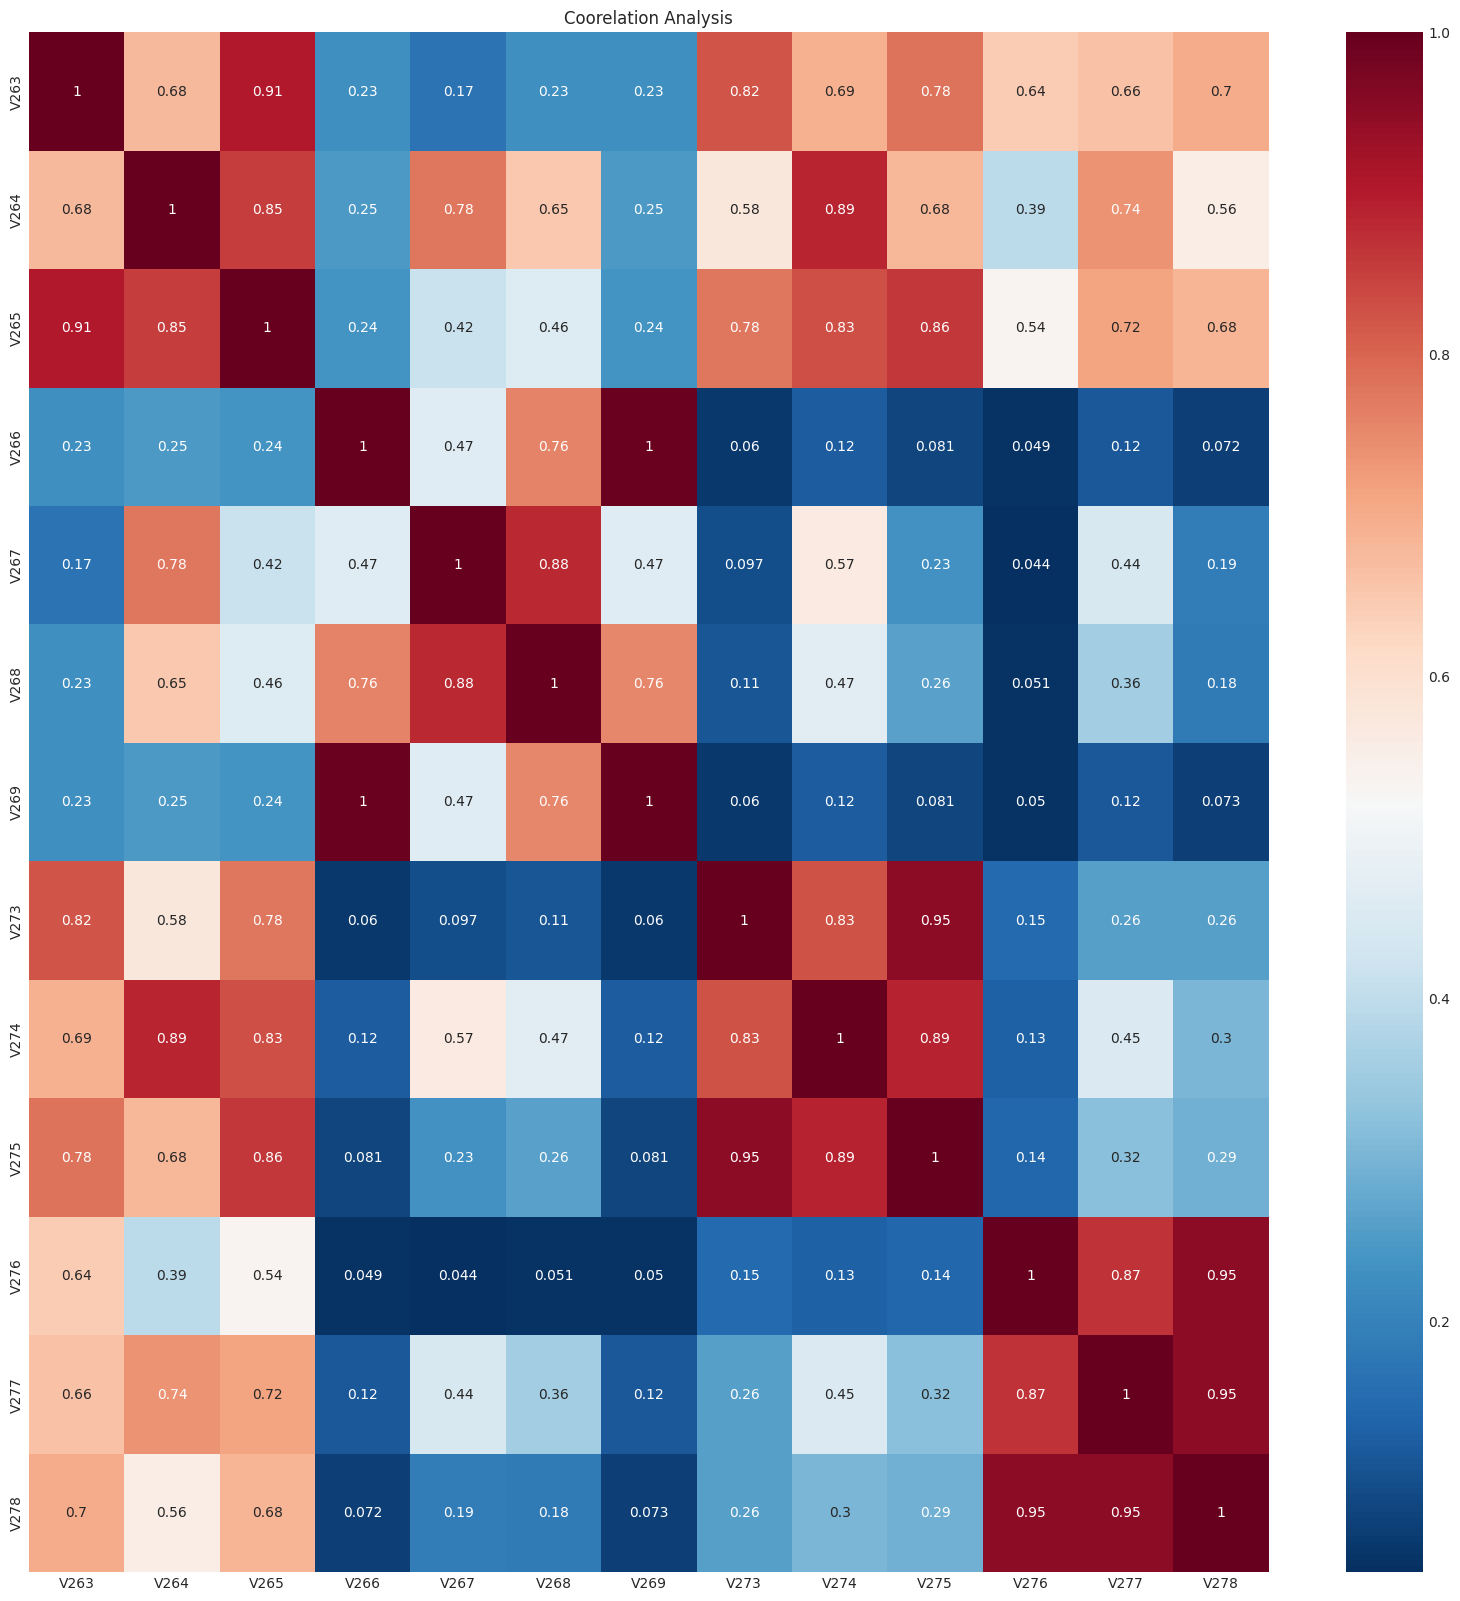

In [118]:
cols =  ['V263','V265','V264','V266','V269','V267','V268','V273','V274','V275','V276','V277','V278']

coorelation_analysis(cols,title='Coorelation Analysis',size=(20,20))

In [119]:
pairs =[['V263','V265','V264'],['V266','V269'],['V267','V268'],['V273','V274','V275'],['V276','V277','V278']]

reduce_groups(pairs)

['V264', 'V266', 'V267', 'V274', 'V277']

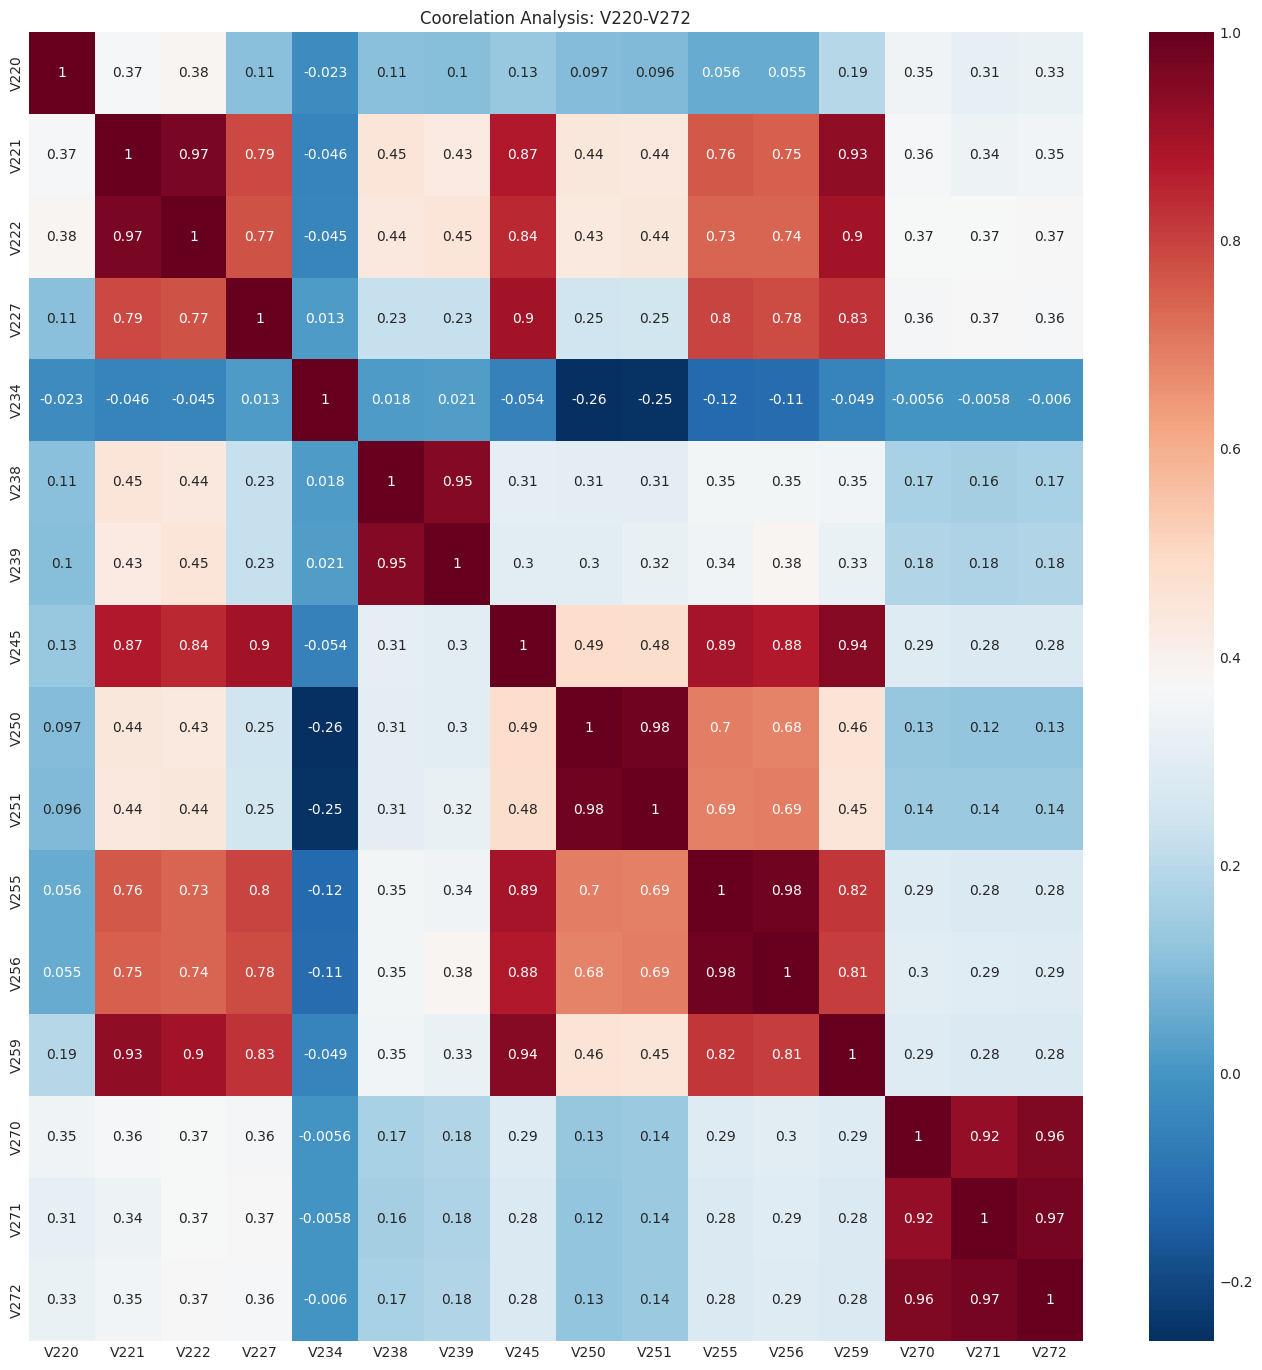

In [120]:
cols = ['V245', 'V271', 'V234', 'V222', 'V238', 'V239', 'V227', 'V250', 
 'V272', 'V270', 'V251', 'V220', 'V255', 'V256', 'V259', 'V221']

coorelation_analysis(cols,title='Coorelation Analysis: V220-V272',size=(17,17))

In [121]:
pairs = [['V220'],['V221','V222','V227','V245','V255','V256','V259'],['V234'],['V238','V239'],
         ['V250','V251'],['V270','V271','V272']]

reduce_groups(pairs)

['V220', 'V221', 'V234', 'V238', 'V250', 'V271']

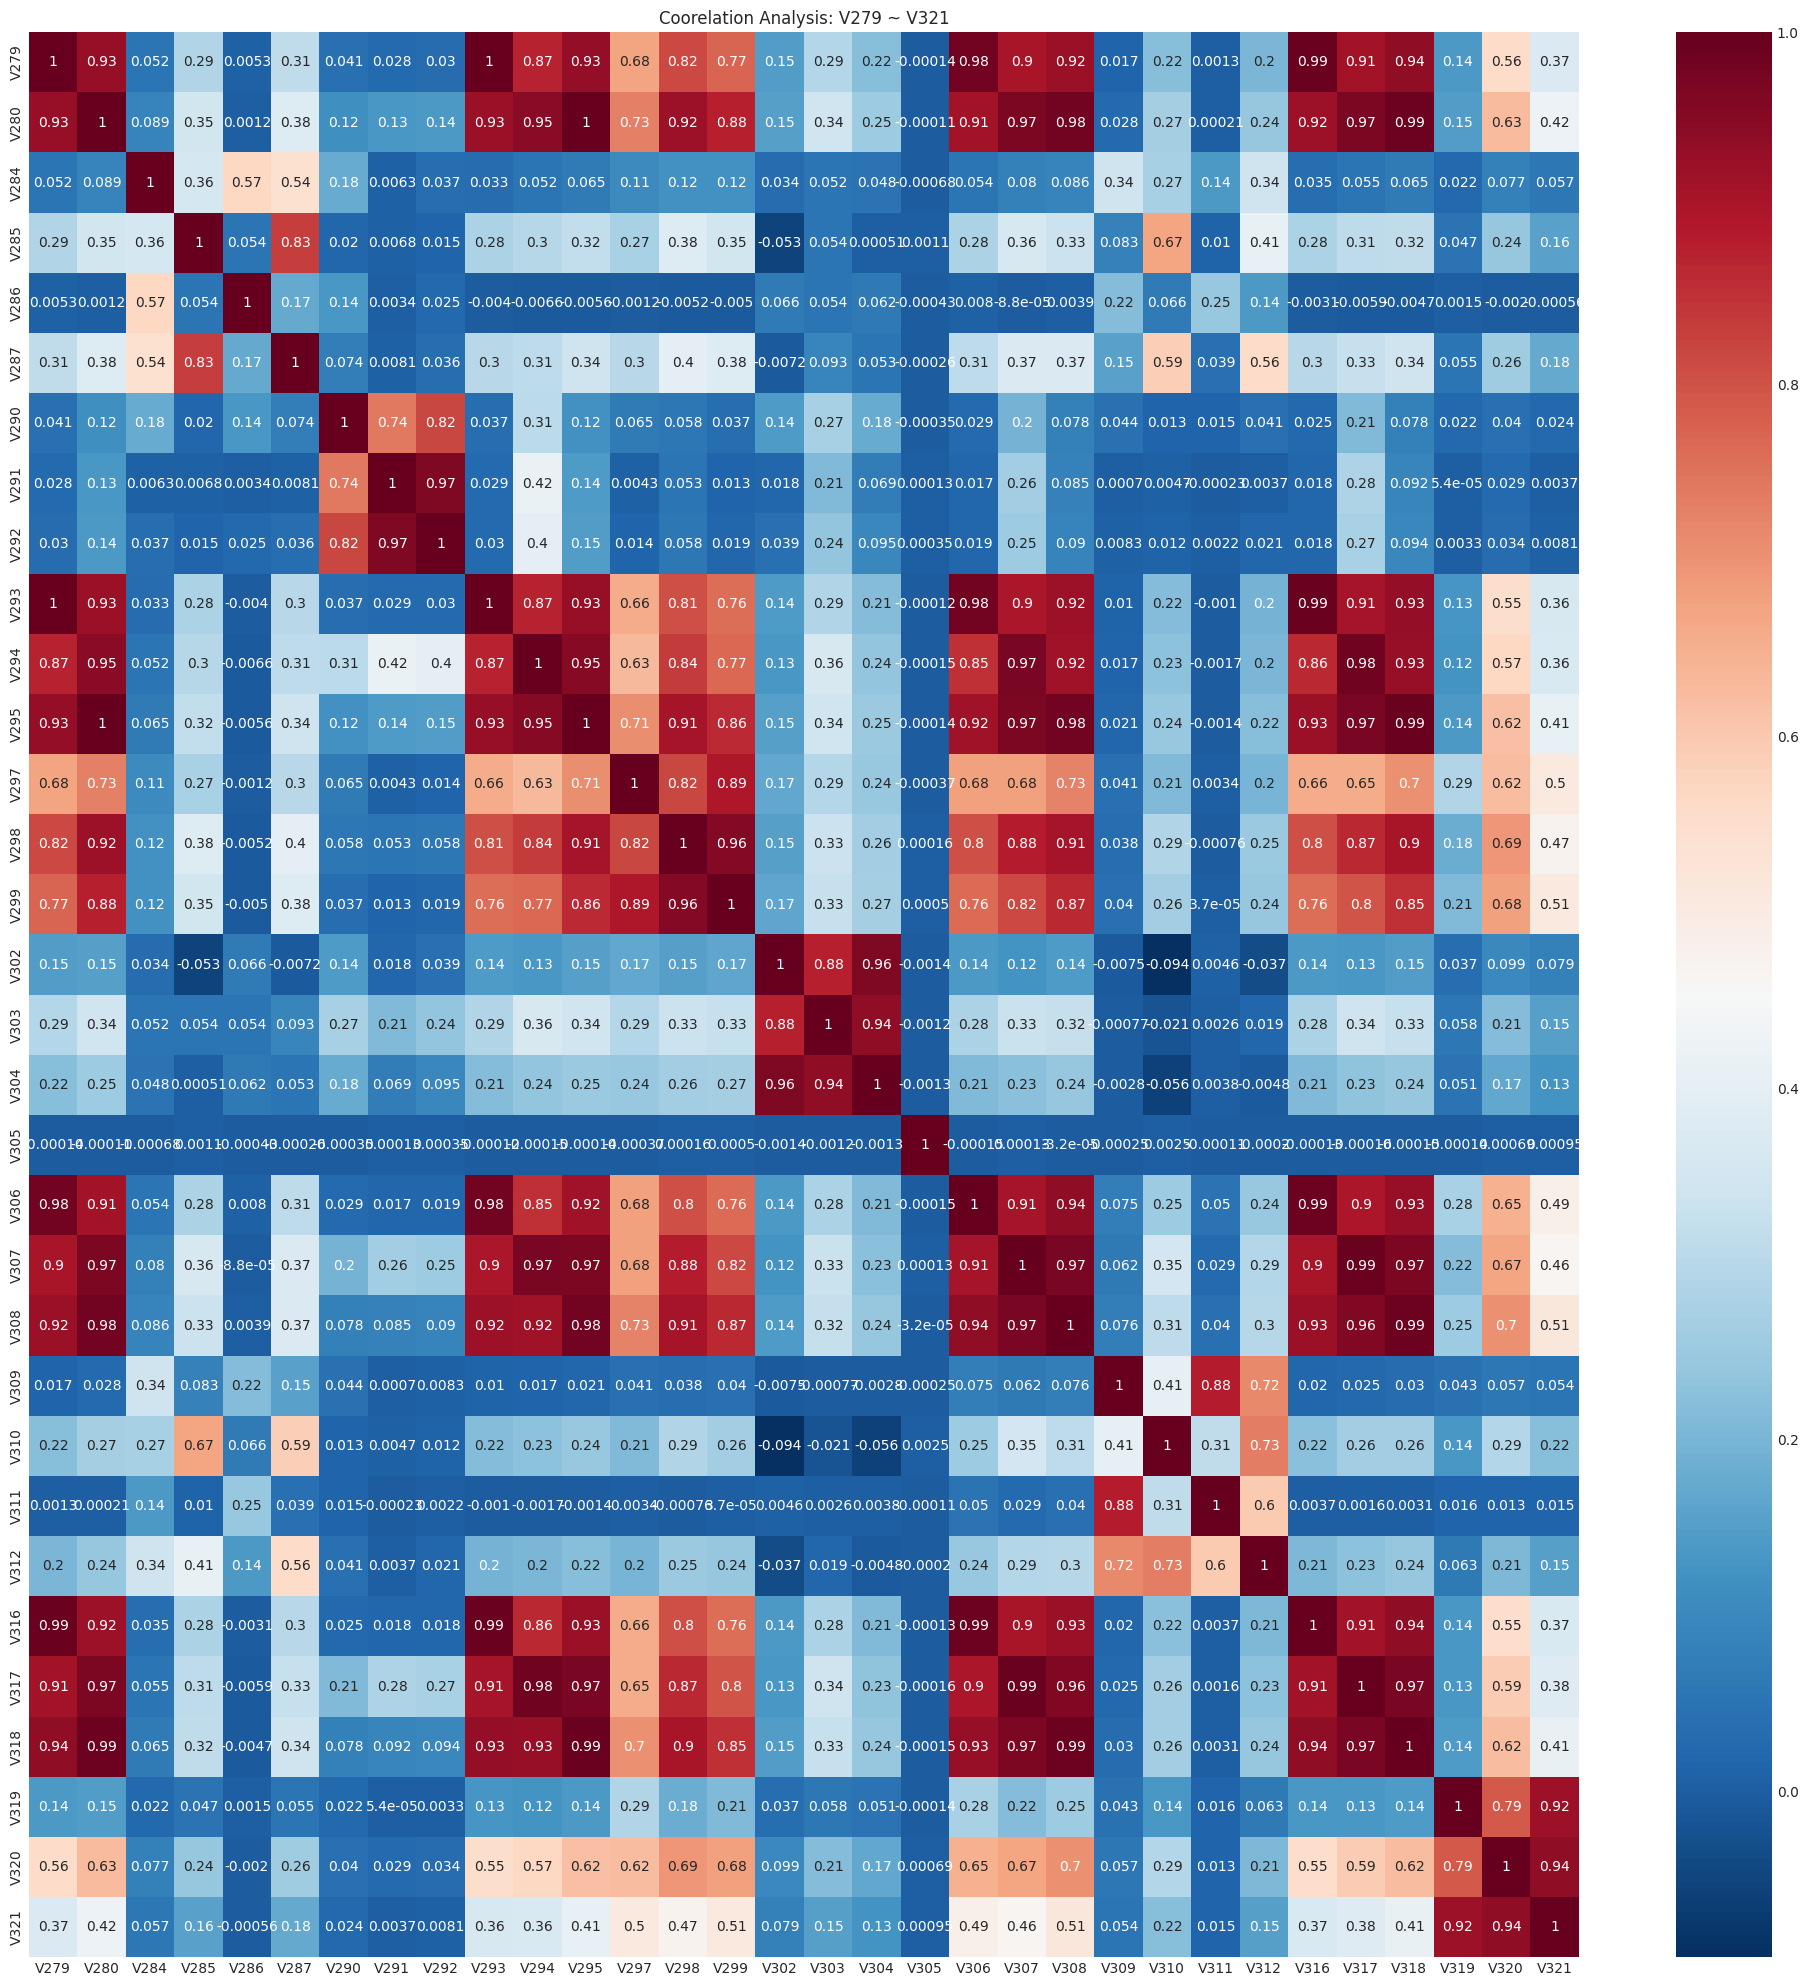

In [122]:
cols = ['V311', 'V321', 'V294', 'V306', 'V305', 'V304', 'V303', 'V302', 'V299', 'V298', 'V297', 'V295', 
        'V293', 'V308', 'V292', 'V291', 'V290', 'V287', 'V286', 'V285', 'V284', 'V280', 'V279', 
        'V320', 'V307', 'V309', 'V312', 'V316', 'V317', 'V318', 'V319', 'V310']


coorelation_analysis(cols,title='Coorelation Analysis: V279 ~ V321',size=(25,25))

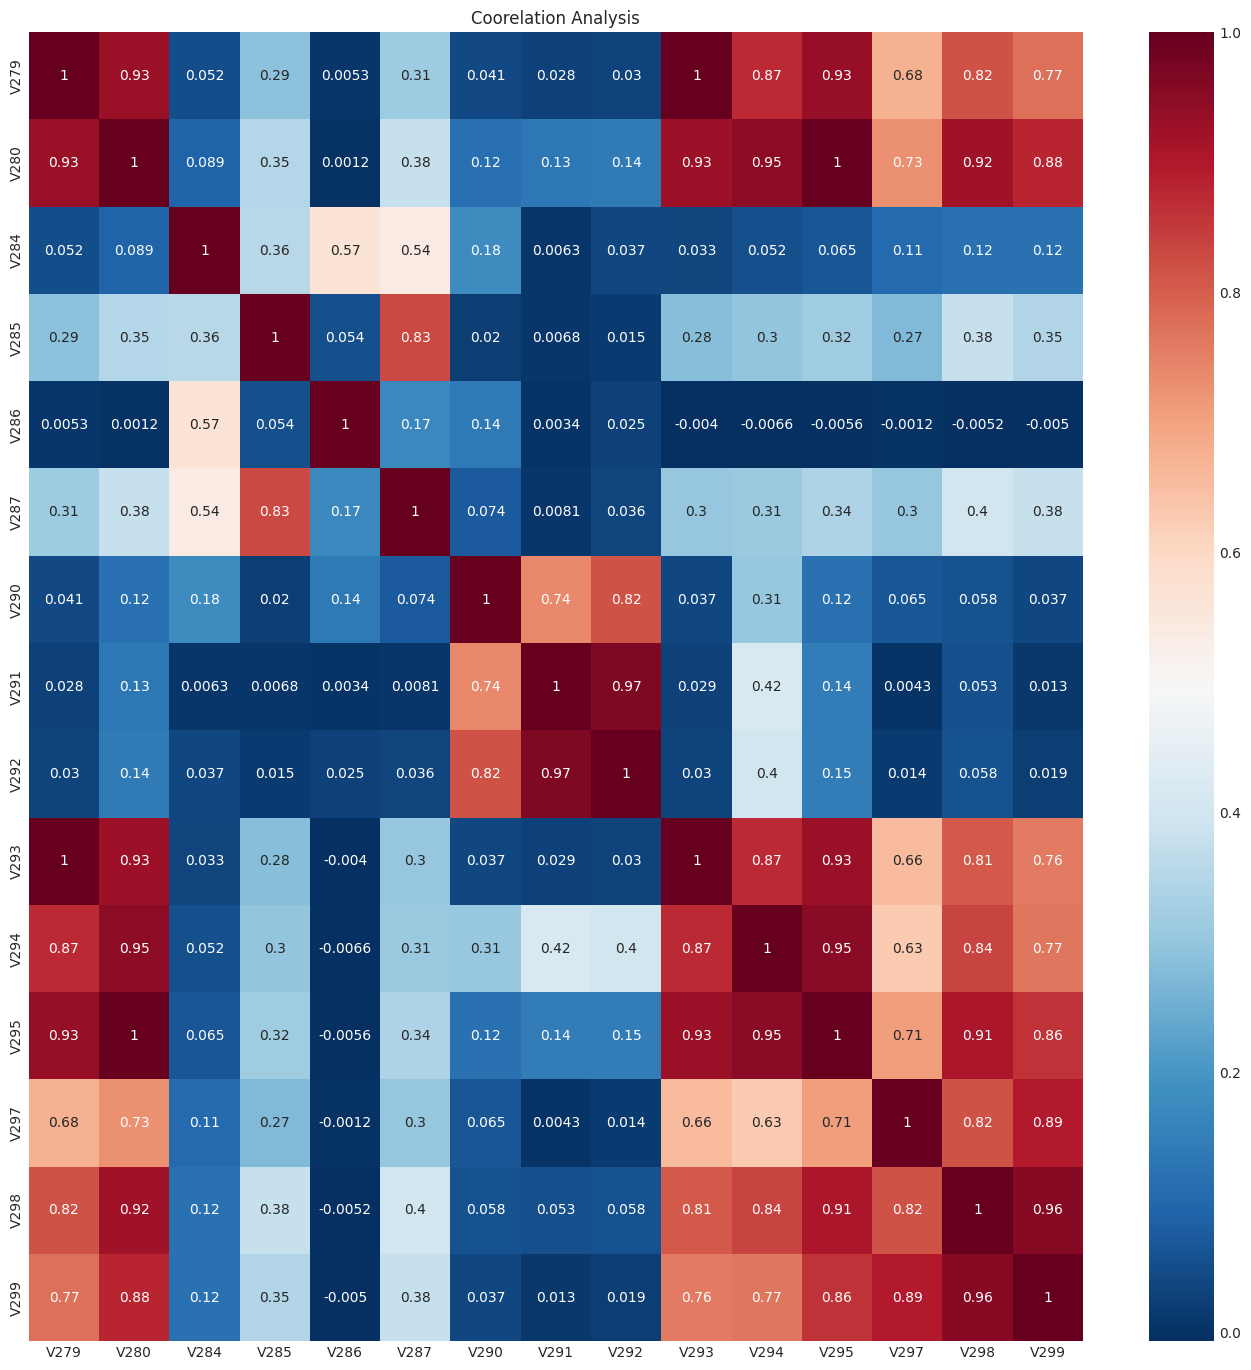

In [123]:
cols = ['V279','V280','V293','V294','V295','V298','V299','V284','V285','V287','V286','V290','V291','V292','V297']

coorelation_analysis(cols,title='Coorelation Analysis',size=(17,17))

In [124]:
pairs = [['V279','V280','V293','V294','V295','V298','V299'],['V284'],['V285','V287'],['V286'],['V290','V291','V292'],['V297']]

reduce_groups(pairs)

['V294', 'V284', 'V285', 'V286', 'V291', 'V297']

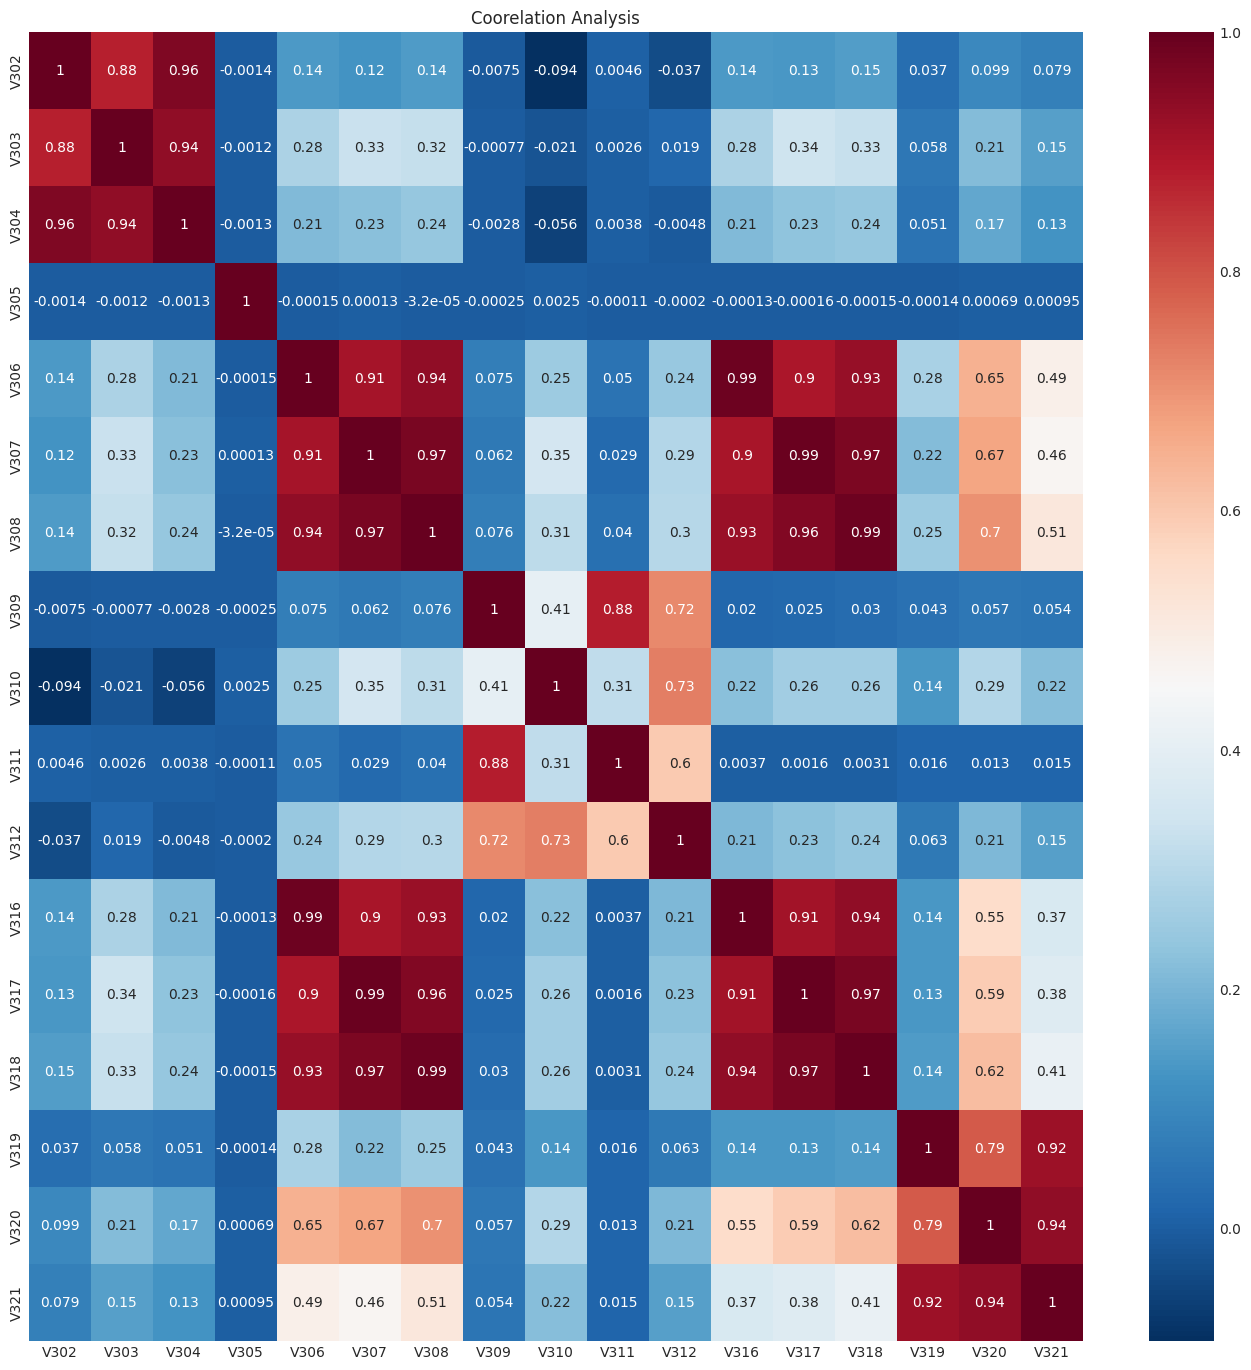

In [125]:
cols = ['V302','V303','V304','V305','V306','V307','V308','V316','V317','V318','V309','V311','V310','V312','V319','V320','V321']

coorelation_analysis(cols,title='Coorelation Analysis',size=(17,17))

In [126]:
pairs = [['V302','V303','V304'],['V305'],['V306','V307','V308','V316','V317','V318'],['V309','V311'],['V310','V312'],['V319','V320','V321']]
red_cols = reduce_groups(pairs)
red_cols

['V303', 'V305', 'V307', 'V309', 'V310', 'V320']

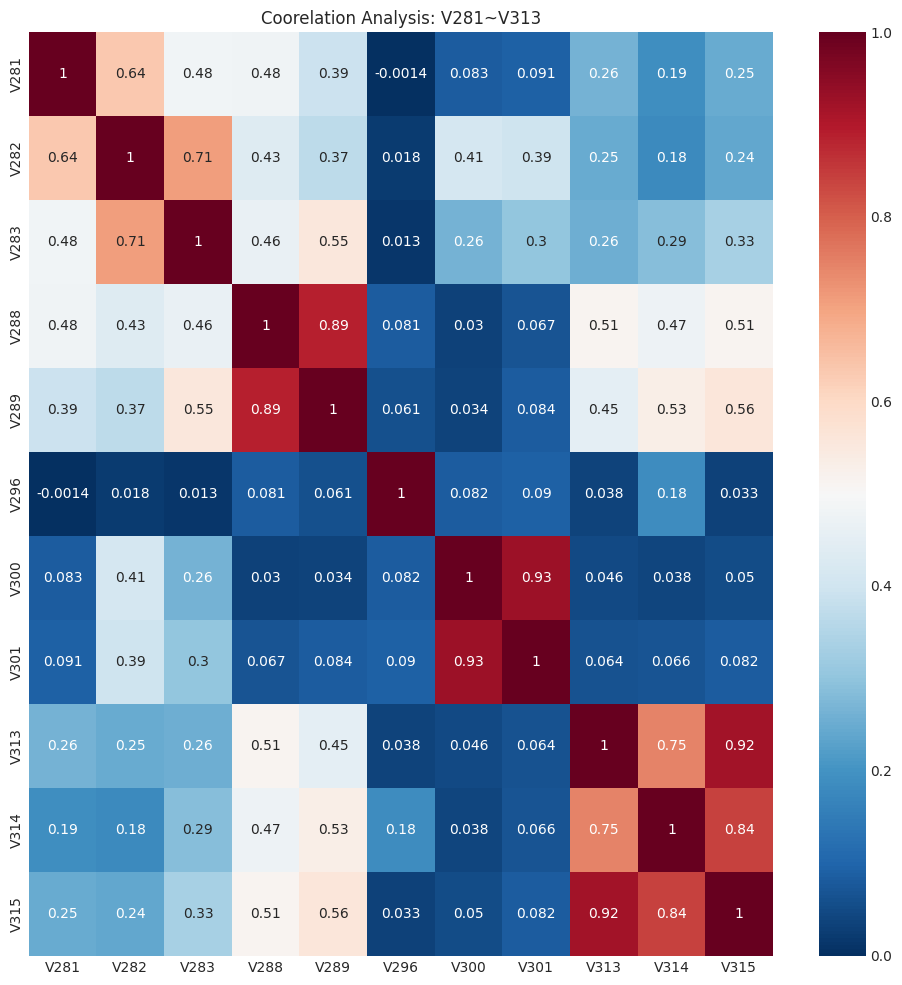

In [127]:
cols = ['V296', 'V289', 'V288', 'V283', 'V282', 'V281', 'V300', 'V301', 'V313', 'V314', 'V315']

coorelation_analysis(cols,title='Coorelation Analysis: V281~V313',size=(12,12))

In [128]:
pairs = [['V281'],['V282','V283'],['V288','V289'],['V296'],['V300','V301'],['V313','V314','V315']]

reduce_groups(pairs)

['V281', 'V283', 'V289', 'V296', 'V301', 'V314']

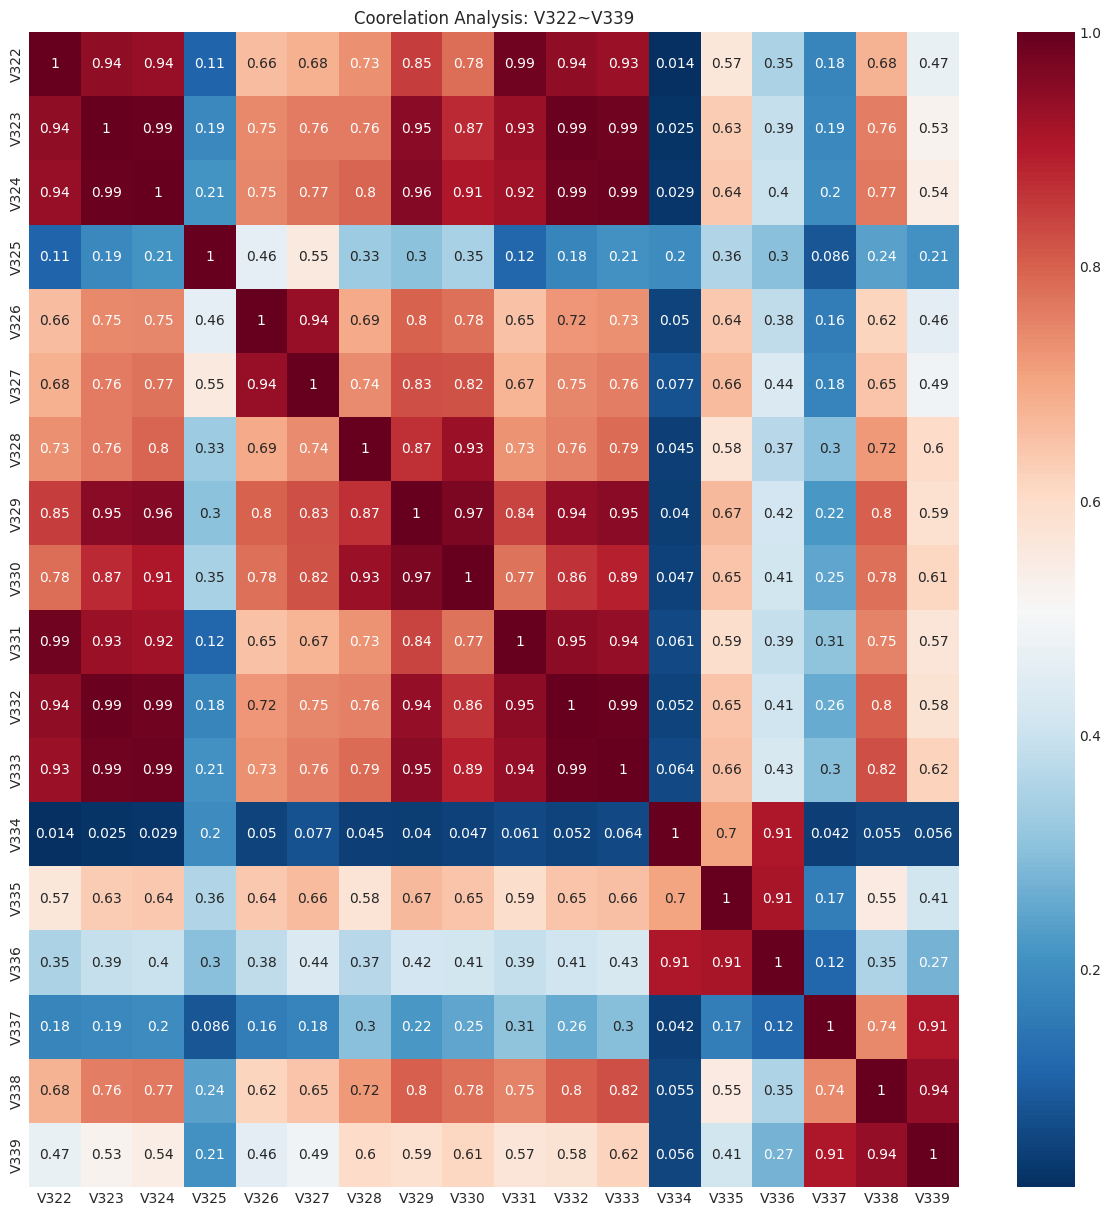

In [129]:
cols = ['V337', 'V333', 'V336', 'V335', 'V334', 'V338', 'V339', 'V324',
 'V332', 'V325', 'V330', 'V329', 'V328', 'V327', 'V326', 'V322', 'V323', 'V331']

coorelation_analysis(cols,title='Coorelation Analysis: V322~V339',size=(15,15))

In [130]:
pairs = [['V322','V323','V324','V326','V327','V328','V329','V330','V331','V332','V333'],['V325'],
         ['V334','V335','V336'],['V337','V338','V339']]

reduce_groups(pairs)

['V332', 'V325', 'V335', 'V338']

In [131]:
reduced_vcols = ['V1', 'V3', 'V4', 'V6', 'V8', 'V11', 'V13', 'V14', 'V17', 'V20',
 'V23', 'V26', 'V27', 'V30', 'V36', 'V37', 'V40', 'V41', 'V44', 'V47', 'V48', 'V54', 'V56', 'V59',
 'V62', 'V65', 'V67', 'V68', 'V70', 'V76', 'V78', 'V80', 'V82', 'V86', 'V88', 'V89', 'V91', 'V96',
 'V98', 'V99', 'V104', 'V107', 'V108', 'V111', 'V115', 'V117', 'V120', 'V121', 'V123', 'V124', 'V127',
 'V129', 'V130', 'V136', 'V138', 'V139', 'V142', 'V147', 'V156', 'V162', 'V165', 'V160', 'V166', 'V178',
 'V176', 'V173', 'V182', 'V187', 'V203', 'V205', 'V207', 'V215', 'V169', 'V171', 'V175', 'V180', 'V185',
 'V188', 'V198', 'V210', 'V209', 'V218', 'V223', 'V224', 'V226', 'V228', 'V229', 'V235', 'V240', 'V258',
 'V257', 'V253', 'V252', 'V260', 'V261', 'V264', 'V266', 'V267', 'V274', 'V277', 'V220', 'V221', 'V234',
 'V238', 'V250', 'V271', 'V294', 'V284', 'V285', 'V286', 'V291',
 'V297', 'V303', 'V305', 'V307', 'V309', 'V310', 'V320', 'V281', 'V283', 'V289', 'V296', 'V301', 'V314', 'V332', 'V325', 'V335', 'V338']

In [132]:
id_cols = [col for col in df_train.columns if col[0]+col[1] == 'id']
df_train[id_cols].head()


id_01    id_02  id_03  id_04  id_05  id_06  id_07  id_08  id_09  id_10  \
0    NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1    NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2    NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3    NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4    0.0  70787.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

   ...     id_29        id_30                id_31  id_32      id_33  \
0  ...       NaN          NaN                  NaN    NaN        NaN   
1  ...       NaN          NaN                  NaN    NaN        NaN   
2  ...       NaN          NaN                  NaN    NaN        NaN   
3  ...       NaN          NaN                  NaN    NaN        NaN   
4  ...  NotFound  Android 7.0  samsung browser 6.2   32.0  2220x1080   

            id_34  id_35  id_36  id_37  id_38  
0             NaN    NaN    NaN    NaN    NaN  
1             NaN    NaN    NaN    NaN    NaN  
2             NaN    NaN    NaN    NaN    NaN  
3             NaN    NaN    NaN    NaN    NaN  
4  match_status:2      T      F      T      T  

[5 rows x 38 columns]

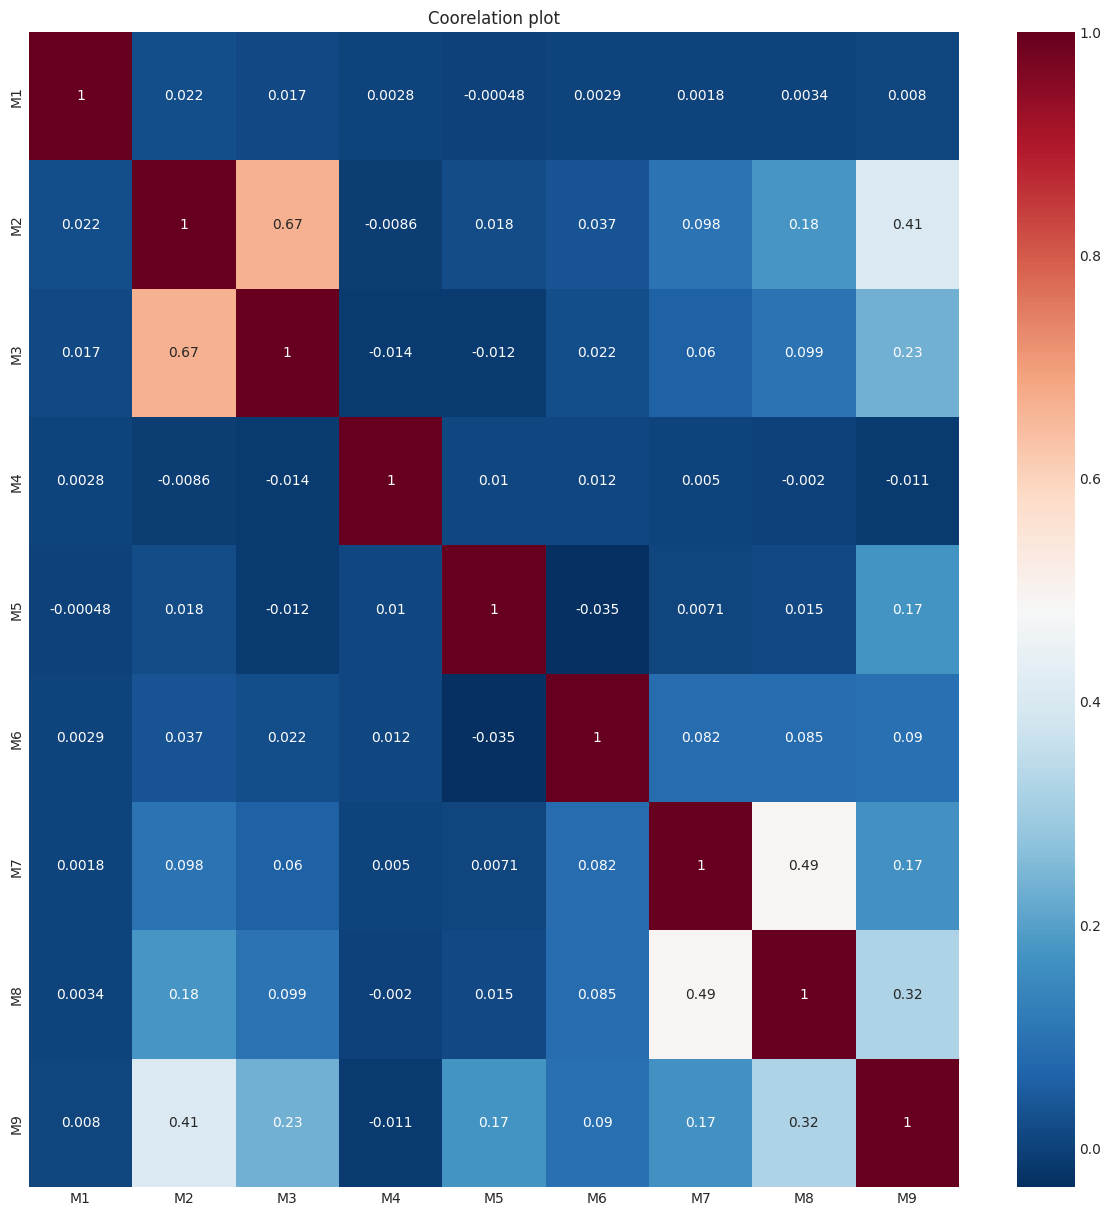

In [133]:
m_cols = [col for col in df_train.columns if col[0] == 'M']

mp = {'F':0,'T':1,'M0':0,'M1':1,'M2':2}
for c in m_cols: df_train[c] = df_train[c].map(mp)

fig,axes = plt.subplots(1,1,figsize=(15,15))
df_corr = df_train[m_cols].corr()
sns.heatmap(df_corr,annot=True,cmap='RdBu_r')
axes.title.set_text('Coorelation plot')
plt.show()

In [134]:
cat_cols = (['ProductCD'] +
            ['card%d' % i for i in range(1, 7)] +
            ['addr1', 'addr2', 'P_emaildomain', 'R_emaildomain'] +
            ['M%d' % i for i in range(1, 10)] +
            ['DeviceType', 'DeviceInfo'] +
            ['id_%d' % i for i in range(12, 39)])


type_map = {c: str for c in cat_cols}
df_train[cat_cols] = df_train[cat_cols].astype(type_map, copy=False)
df_test[cat_cols] = df_test[cat_cols].astype(type_map, copy=False)

######################################################################################

id_cols = ['TransactionID', 'TransactionDT']
target = 'isFraud'

numeric_cols =  [
    'TransactionAmt', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10',
    'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11',
    'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
    'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25',
    'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39',
    'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53',
    'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67',
    'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81',
    'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95',
    'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108',
    'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120',
    'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132',
    'V133', 'V134', 'V135', 'V136', 'V137', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144',
    'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156',
    'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168',
    'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180',
    'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192',
    'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204',
    'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216',
    'V217', 'V218', 'V219', 'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228',
    'V229', 'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237', 'V238', 'V239', 'V240',
    'V241', 'V242', 'V243', 'V244', 'V245', 'V246', 'V247', 'V248', 'V249', 'V250', 'V251', 'V252',
    'V253', 'V254', 'V255', 'V256', 'V257', 'V258', 'V259', 'V260', 'V261', 'V262', 'V263', 'V264',
    'V265', 'V266', 'V267', 'V268', 'V269', 'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276',
    'V277', 'V278', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285', 'V286', 'V287', 'V288',
    'V289', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300',
    'V301', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312',
    'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321', 'V322', 'V323', 'V324',
    'V325', 'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336',
    'V337', 'V338', 'V339', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08',
    'id_09', 'id_10', 'id_11'
]


reduced_vcols = ['V1', 'V3', 'V4', 'V6', 'V8', 'V11', 'V13', 'V14', 'V17', 'V20',
 'V23', 'V26', 'V27', 'V30', 'V36', 'V37', 'V40', 'V41', 'V44', 'V47', 'V48', 'V54', 'V56', 'V59',
 'V62', 'V65', 'V67', 'V68', 'V70', 'V76', 'V78', 'V80', 'V82', 'V86', 'V88', 'V89', 'V91', 'V96',
 'V98', 'V99', 'V104', 'V107', 'V108', 'V111', 'V115', 'V117', 'V120', 'V121', 'V123', 'V124', 'V127',
 'V129', 'V130', 'V136', 'V138', 'V139', 'V142', 'V147', 'V156', 'V162', 'V165', 'V160', 'V166', 'V178',
 'V176', 'V173', 'V182', 'V187', 'V203', 'V205', 'V207', 'V215', 'V169', 'V171', 'V175', 'V180', 'V185',
 'V188', 'V198', 'V210', 'V209', 'V218', 'V223', 'V224', 'V226', 'V228', 'V229', 'V235', 'V240', 'V258',
 'V257', 'V253', 'V252', 'V260', 'V261', 'V264', 'V266', 'V267', 'V274', 'V277', 'V220', 'V221', 'V234',
 'V238', 'V250', 'V271', 'V294', 'V284', 'V285', 'V286', 'V291',
 'V297', 'V303', 'V305', 'V307', 'V309', 'V310', 'V320', 'V281', 'V283', 'V289', 'V296', 'V301', 'V314', 'V332', 'V325', 'V335', 'V338']


In [135]:
# droping v cols 
drop_cols = [col for col in df_train.columns if col[0] == 'V' and col not in reduced_vcols]

print(f'dropping {len(drop_cols)} columns')
df_train = df_train.drop(columns=drop_cols)
df_test = df_test.drop(columns=drop_cols)

dropping 211 columns


In [147]:
## Train and test split¶
y_train = df_train['isFraud']
Xx_train = df_train.drop(columns=['isFraud'])
X_test = df_test.copy()

print(Xx_train.shape)
print(y_train.shape)
print(X_test.shape)
gc.collect()

(590540, 222)
(590540,)
(506691, 222)


7845

In [151]:
# Label encoding all cat features
for col in Xx_train.columns:

    if col in cat_cols:
        # label encode all cat columns
        dff = pd.concat([Xx_train[col],X_test[col]])
        dff,_ = pd.factorize(dff,sort=True)
        if dff.max()>32000:
            print(col,'needs int32 datatype')

        Xx_train[col] = dff[:len(Xx_train)].astype('int16')
        X_test[col] = dff[len(Xx_train):].astype('int16')

In [152]:
rem_cols = []
rem_cols.extend(['TransactionDT','TransactionID'])

cols = [col for col in Xx_train.columns if col not in rem_cols]
len(cols)

220

In [153]:
# Scaling numeric features
for col in cols:
    if col not in cat_cols:
        # min max scalar
        dff = pd.concat([Xx_train[col],X_test[col]])
        dff = (dff - dff.min())/(dff.max() - dff.min())
        dff.fillna(-1,inplace=True)

        Xx_train[col] = dff[:len(Xx_train)]
        X_test[col] = dff[len(Xx_train):]

del dff

(590540, 222)
(590540,)
(506691, 222)


0

In [ ]:
#### Cross-validation ####

In [154]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [155]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE

# Initialize the XGBoost model
clf = xgb.XGBClassifier(
    n_estimators=2000,
    max_depth=12,
    learning_rate=0.02,
    subsample=0.8,
    colsample_bytree=0.4,
    missing=-1,
    eval_metric='auc',
    tree_method='gpu_hist'
)

# Define the SMOTE pipeline with XGBoost classifier
pipeline = make_pipeline(SMOTE(random_state=42), clf)

# Perform cross-validation
cv_scores = cross_val_score(pipeline, Xx_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Cross-Validation Scores: [0.96512514 0.76262404 0.94113015 0.95278897 0.97454025]
Mean CV Score: 0.9192417109763944


In [158]:
import xgboost as xgb
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE

# Initialize the XGBoost model
clf = xgb.XGBClassifier(
    n_estimators=2000,
    max_depth=12,
    learning_rate=0.02,
    subsample=0.8,
    colsample_bytree=0.4,
    missing=-1,
    eval_metric='auc',
    tree_method='gpu_hist'
)

# Define the SMOTE pipeline with XGBoost classifier
pipeline = make_pipeline(SMOTE(random_state=42), clf)

# Perform cross-validation and obtain predictions
y_pred = cross_val_predict(pipeline, Xx_train, y_train, cv=5)

# Evaluate the predictions
accuracy = accuracy_score(y_train, y_pred)
print("Train Accuracy:", accuracy)


Train Accuracy: 0.9192417109763945


In [165]:
# Calculate precision
precision = precision_score(y_train, y_pred)

# Calculate recall
recall = recall_score(y_train, y_pred)

# Calculate F1-score
f1 = f1_score(y_train, y_pred)

# Calculate confusion matrix
train_cf = confusion_matrix(y_train, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(train_cf,annot=True,annot_kws={"size": 16},fmt="0")
plt.title('Test confusion matrix')
plt.show()

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

In [ ]:
////////////////////////////////////
work correcttttt

In [166]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_val_predict,train_test_split
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(Xx_train, y_train, test_size=0.2, random_state=42)

# Initialize the XGBoost model
clf = xgb.XGBClassifier(
    n_estimators=2000,
    max_depth=12,
    learning_rate=0.02,
    subsample=0.8,
    colsample_bytree=0.4,
    missing=-1,
    eval_metric='auc',
    tree_method='gpu_hist'
)

# Define the number of folds for cross-validation
n_folds = 5

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Perform cross-validation and obtain predictions
cv_predictions = cross_val_predict(clf, X_train, y_train, cv=skf, method='predict')

# Train the final model on the entire training data
final_model = clf.fit(X_train, y_train)

# Make predictions on X_train
y_train_pred = final_model.predict(X_train)

# Evaluate the model (optional)
# For example, you can use accuracy_score
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", train_accuracy)

# Make predictions on X_test
y_test_pred = final_model.predict(X_test)


# Evaluate the predictions
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.997771107799641
Test Accuracy: 0.9863260744403427


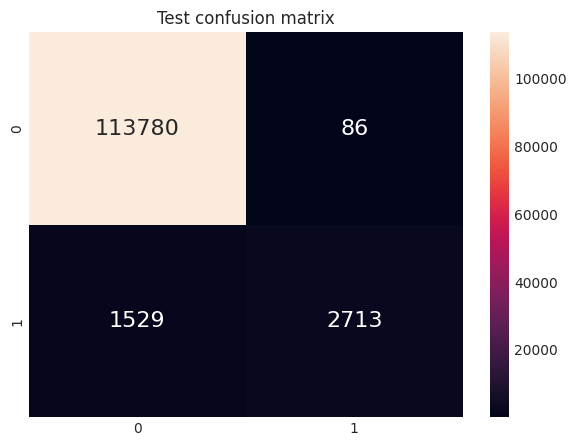

Precision: 0.9692747409789211
Recall: 0.6395568128241396
F1 Score: 0.7706291719926146


In [144]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

# Calculate precision, recall, F1-score, and confusion matrix
# Calculate precision
precision = precision_score(y_test, y_test_pred)

# Calculate recall
recall = recall_score(y_test, y_test_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_test_pred)

# Calculate confusion matrix
train_cf = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(7,5))
sns.heatmap(train_cf,annot=True,annot_kws={"size": 16},fmt="0")
plt.title('Test confusion matrix')
plt.show()

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


In [ ]:
y_test_pred = final_model.predict(X_test)

# Evaluate the predictions using additional metrics
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, final_model.predict_proba(X_test)[:, 1])

print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1)


In [ ]:
######   End

In [ ]:
from imblearn.over_sampling import SMOTE


In [ ]:
x_train = X_train[cols]
x_test = X_test[cols]


idx_train = x_train.index[:int(x_train.shape[0]*0.75)]  
idx_validation = x_train.index[int(x_train.shape[0]*0.75):]
    
print(f'fitting model on {len(cols)} columns')
clf = xgb.XGBClassifier( 
        n_estimators=2000,
        max_depth=12, 
        learning_rate=0.02, 
        subsample=0.8,
        colsample_bytree=0.4, 
        missing=-1, 
        eval_metric='auc',
        tree_method='gpu_hist' 
          )
model = clf.fit(x_train.loc[idx_train,cols], y_train[idx_train], 
            eval_set=[(x_train.loc[idx_validation,cols],y_train[idx_validation])],
            verbose=50, early_stopping_rounds=100)

In [ ]:
y_train_pred = model.predict(x_train.iloc[idx_train])
y_test_pred = model.predict(x_train.iloc[idx_validation])

train_fpr, train_tpr, thresholds = roc_curve(y_train.iloc[idx_train], model.predict_proba(x_train.iloc[idx_train])[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_train.iloc[idx_validation], model.predict_proba(x_train.iloc[idx_validation])[:,1])

#Area under ROC curve
print('Area under train roc {}'.format(auc(train_fpr, train_tpr)))
print('Area under test roc {}'.format(auc(test_fpr, test_tpr)))

In [ ]:
train_cf = confusion_matrix(y_train.iloc[idx_train],y_train_pred)
plt.figure(figsize=(7,5))
sns.heatmap(train_cf,annot=True,annot_kws={"size": 16},fmt="0")
plt.title('Train confusion matrix')
plt.show()


cv_cf = confusion_matrix(y_train.iloc[idx_validation],y_test_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cv_cf,annot=True,annot_kws={"size": 16},fmt="0")
plt.title('Test confusion matrix')
plt.show()

In [ ]:
y_pred_test = model.predict_proba(x_test)[:,1]
submission = pd.read_csv('/kaggle/input/ieee-fraud-detection/sample_submission.csv')
submission['isFraud'] = y_pred_test
submission.to_csv('submission.csv',index=False)
submission.head()

In [ ]:
from sklearn.model_selection import train_test_split
smote = SMOTE(random_state=42)

# Reshape the data if necessary (only if x_train and y_train are pandas DataFrames)
x_train_array = x_train.loc[idx_train, cols].values
y_train_array = y_train[idx_train].values

# Fit SMOTE on the training data
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_array, y_train_array)

# Split the resampled data into training and validation sets
x_train_smote, x_validation_smote, y_train_smote, y_validation_smote = train_test_split(
    x_train_resampled, y_train_resampled, test_size=0.25, random_state=42)

print(f'fitting model on {len(cols)} columns')
clf = xgb.XGBClassifier( 
        n_estimators=2000,
        max_depth=12, 
        learning_rate=0.02, 
        subsample=0.8,
        colsample_bytree=0.4, 
        missing=-1, 
        eval_metric='auc',
        tree_method='gpu_hist' 
          )
model = clf.fit(x_train_smote, y_train_smote, 
            eval_set=[(x_validation_smote, y_validation_smote)],
            verbose=50, early_stopping_rounds=100)


In [ ]:
y_train_pred = model.predict(x_train_smote)
y_test_pred = model.predict(x_validation_smote)

train_fpr, train_tpr, thresholds = roc_curve(y_train.iloc[idx_train], model.predict_proba(x_train.iloc[idx_train])[:,1])
test_fpr, test_tpr, thresholds = roc_curve(x_validation_smote], model.predict_proba(x_train.iloc[idx_validation])[:,1])

#Area under ROC curve
print('Area under train roc {}'.format(auc(train_fpr, train_tpr)))
print('Area under test roc {}'.format(auc(test_fpr, test_tpr)))

In [ ]:
train_cf = confusion_matrix(y_train_smote,y_train_pred)
plt.figure(figsize=(7,5))
sns.heatmap(train_cf,annot=True,annot_kws={"size": 16},fmt="0")
plt.title('Train confusion matrix')
plt.show()


cv_cf = confusion_matrix( y_validation_smote,y_test_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cv_cf,annot=True,annot_kws={"size": 16},fmt="0")
plt.title('Test confusion matrix')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score
train_f1 = f1_score(y_train_smote,y_train_pred)

# Calculate recall
train_recall = recall_score(y_train_smote,y_train_pred)

# Calculate F1 score and recall for validation set
cv_f1 = f1_score( y_validation_smote,y_test_pred)
cv_recall = recall_score( y_validation_smote,y_test_pred)

print("Training Set - F1 Score:", train_f1)
print("Training Set - Recall:", train_recall)
print("Validation Set - F1 Score:", cv_f1)
print("Validation Set - Recall:", cv_recall)

In [ ]:
# True fraud cases
true_fraud = sum(y_validation_smote == 1)

# Detected fraud cases
detected_fraud = sum((y_test_pred == 1) & (y_validation_smote == 1))

print('Number of true fraud cases: {}'.format(true_fraud))
print('Number of correctly detected fraud cases: {}'.format(detected_fraud))

In [ ]:
y_pred_test = model.predict_proba(x_test)[:,1]
submission = pd.read_csv('/kaggle/input/ieee-fraud-detection/sample_submission.csv')
submission['isFraud'] = y_pred_test
submission.to_csv('submission.csv',index=False)
submission.head()